## Import all the needed packages

In [2]:
%matplotlib inline

# DataFrame
import pandas as pd

# Elasticsearch
# from elasticsearch import Elasticsearch, helpers

# datetime
from datetime import datetime

# isnan()
import math

# plot
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Begin to experiment anomaly detection approaches

1.  MWT2_a -> MWT2_b


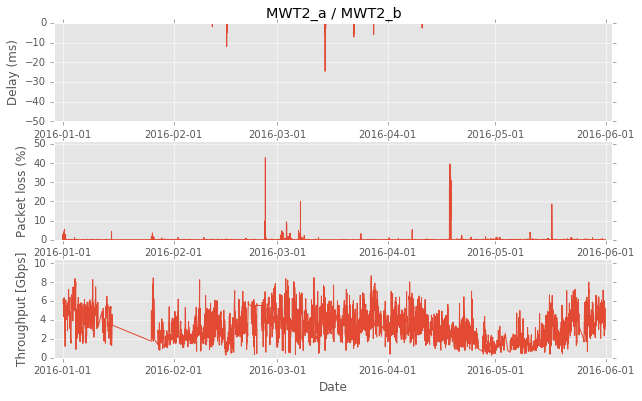

2.  MWT2_a -> MWT2_c


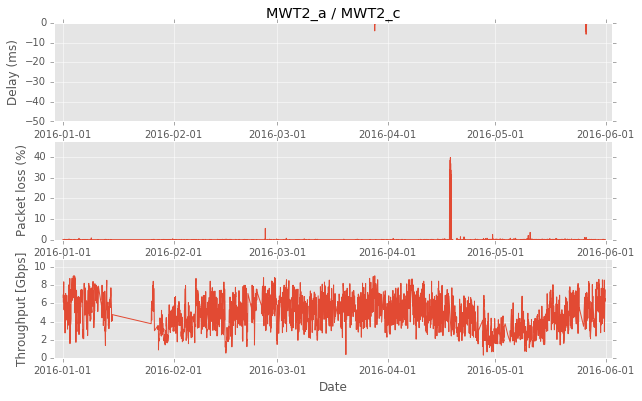

3.  MWT2_a -> SFU


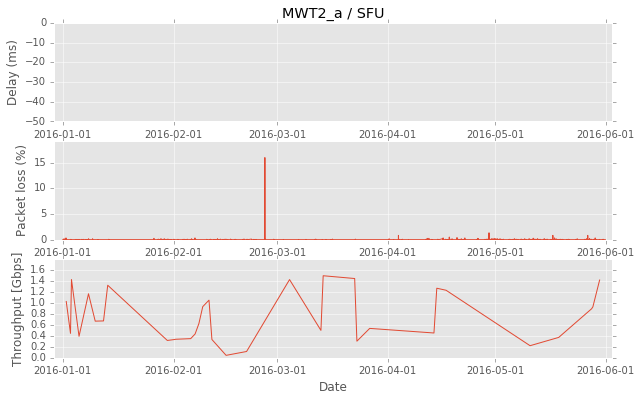

4.  MWT2_a -> CERN


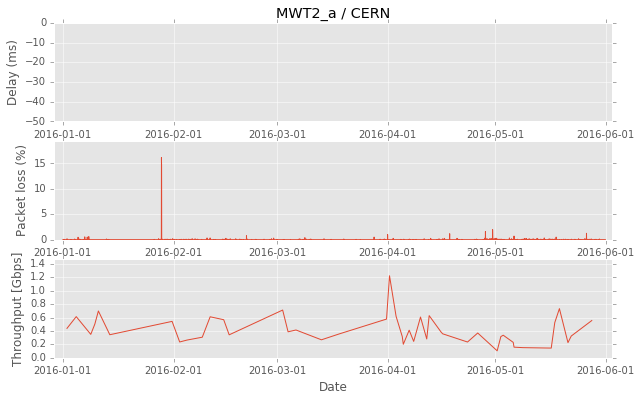

5.  MWT2_a -> BEIJING


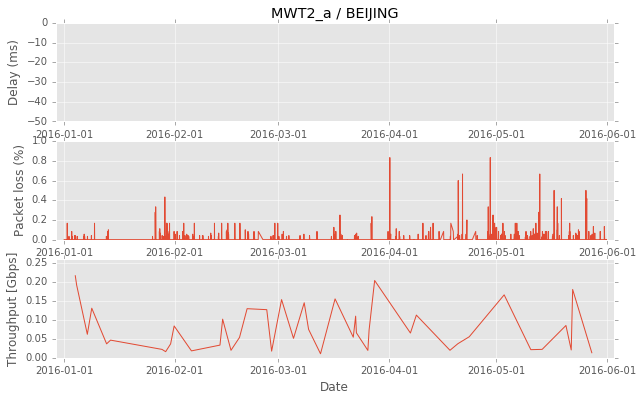

6.  MWT2_b -> MWT2_a


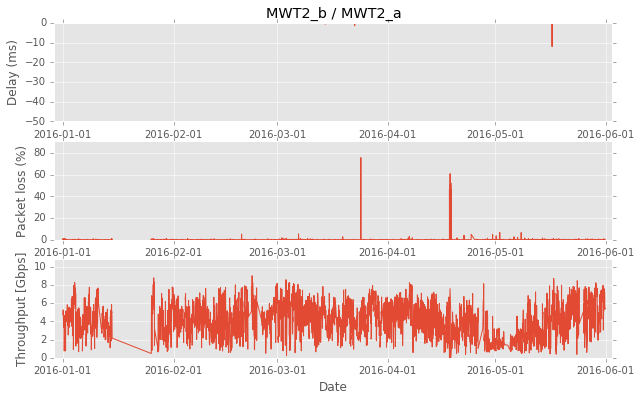

7.  MWT2_b -> MWT2_c


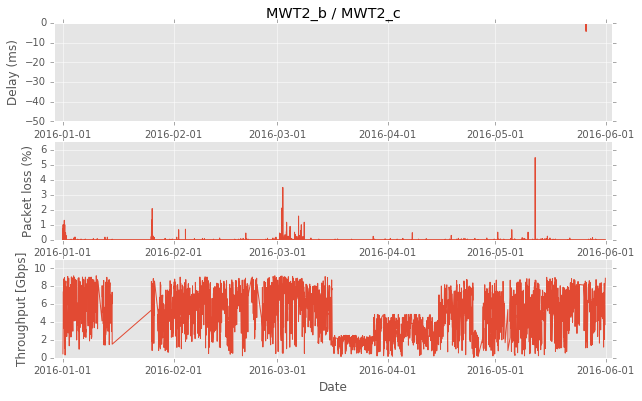

8.  MWT2_b -> SFU


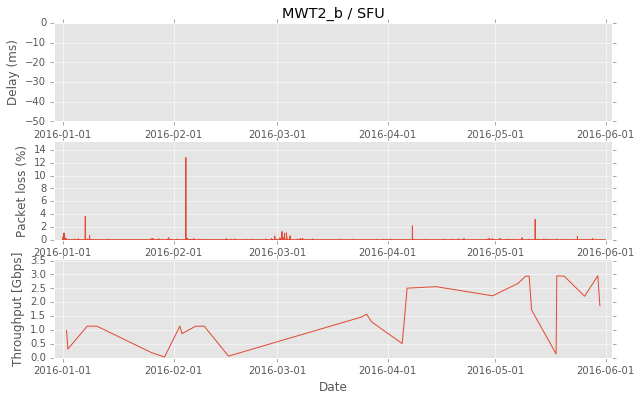

9.  MWT2_b -> CERN


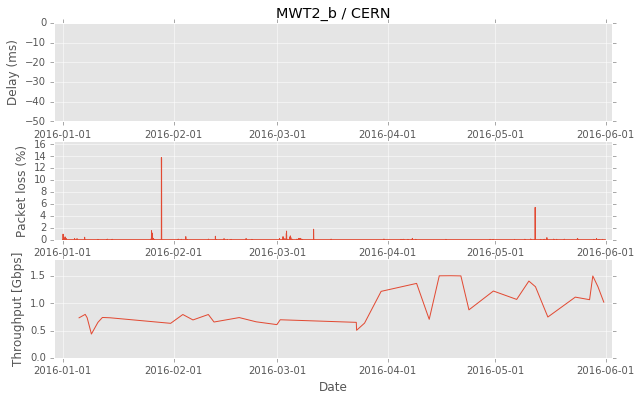

10.  MWT2_b -> BEIJING


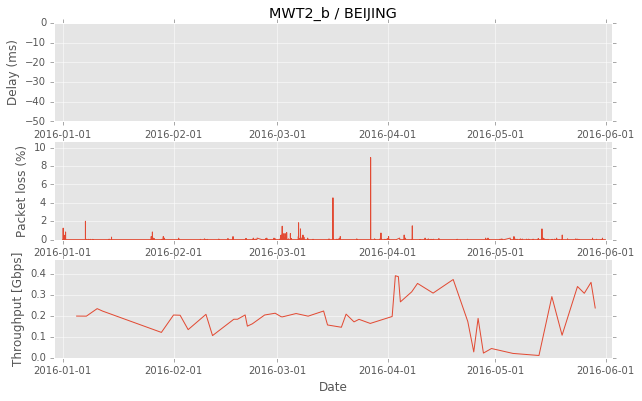

11.  MWT2_c -> MWT2_a


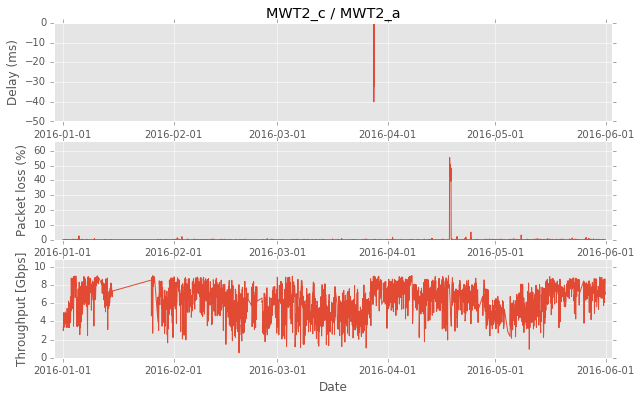

12.  MWT2_c -> MWT2_b


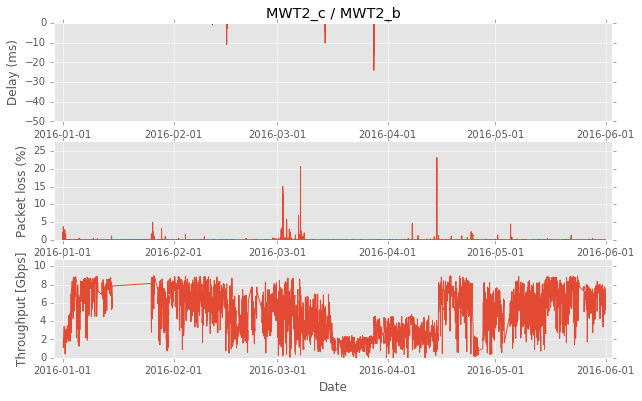

13.  MWT2_c -> SFU


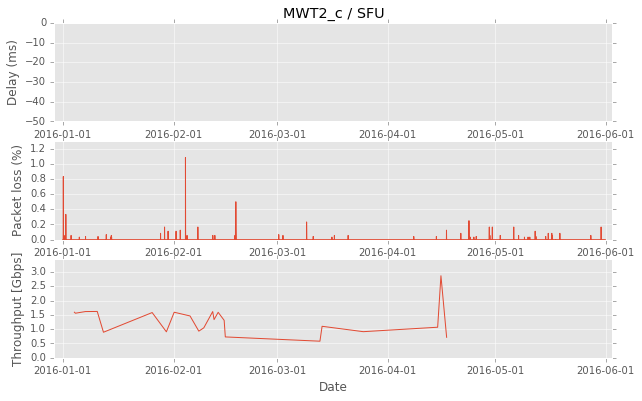

14.  MWT2_c -> CERN


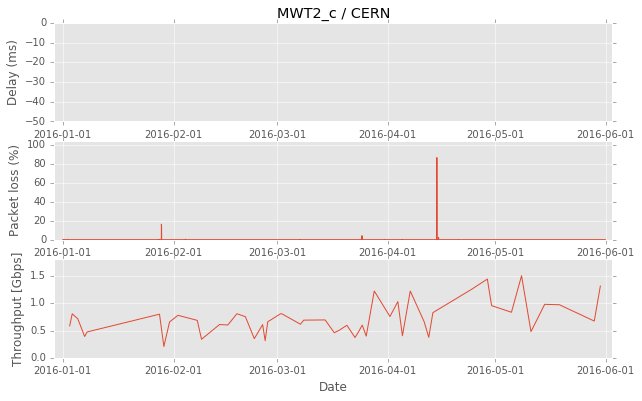

15.  MWT2_c -> BEIJING


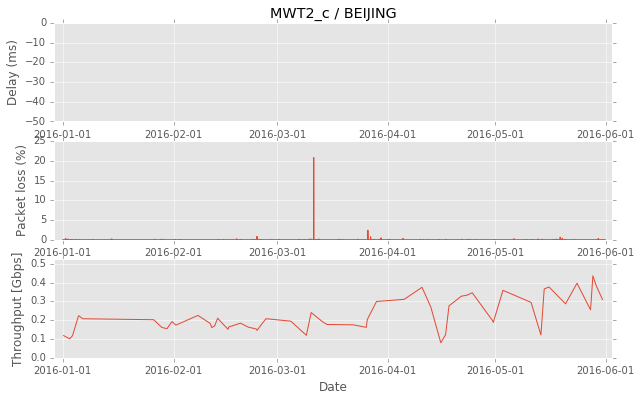

16.  SFU -> MWT2_a


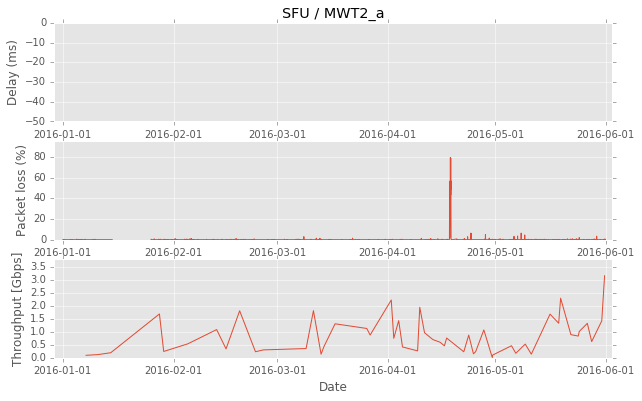

17.  SFU -> MWT2_b


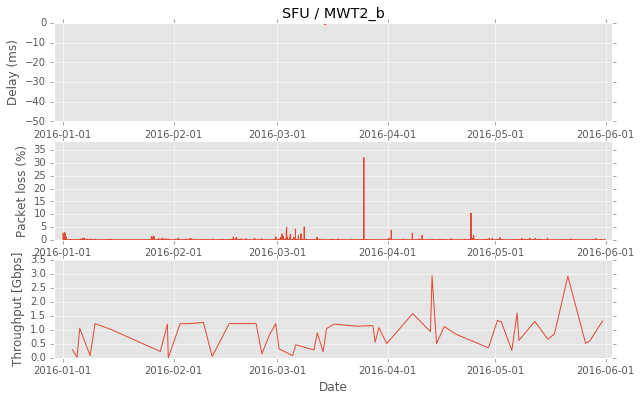

18.  SFU -> MWT2_c


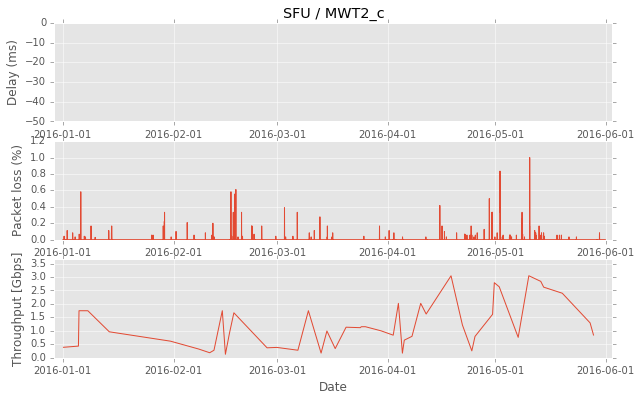

19.  SFU -> CERN


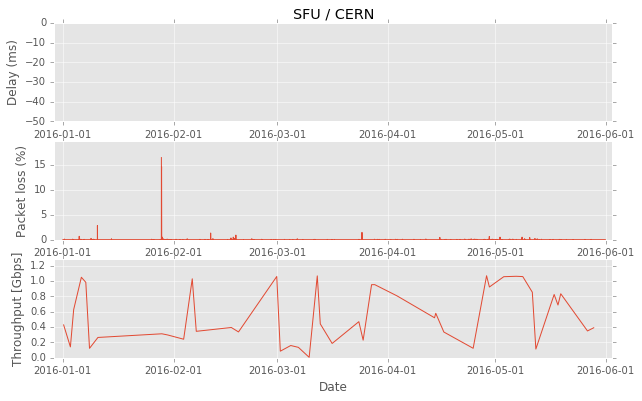

20.  SFU -> BEIJING


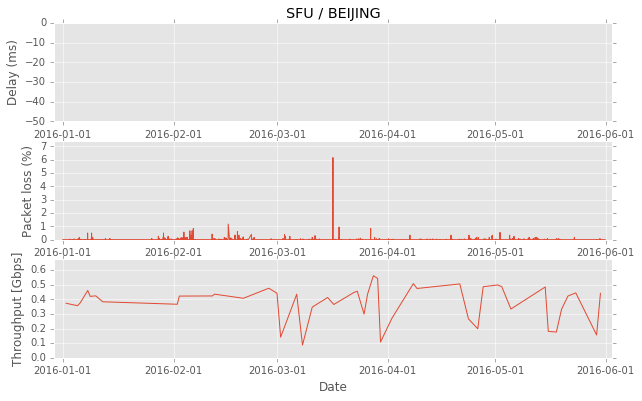

21.  CERN -> MWT2_a


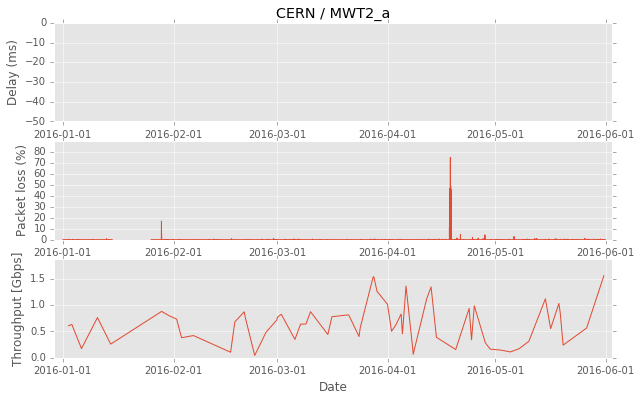

22.  CERN -> MWT2_b


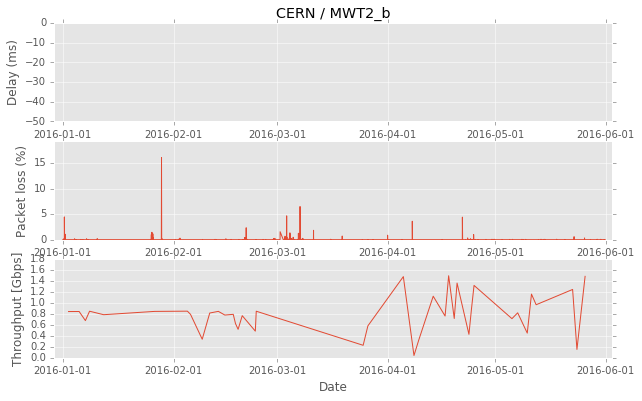

23.  CERN -> MWT2_c


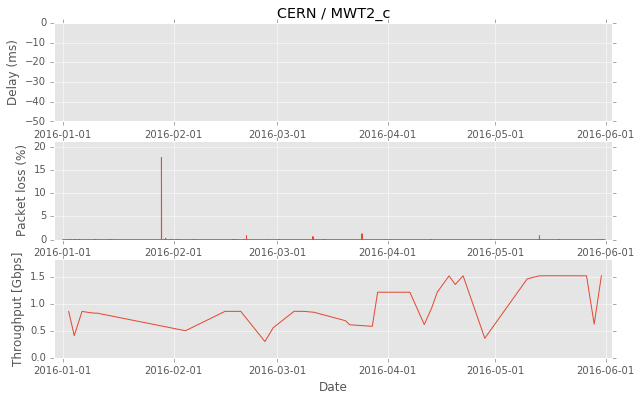

24.  CERN -> SFU


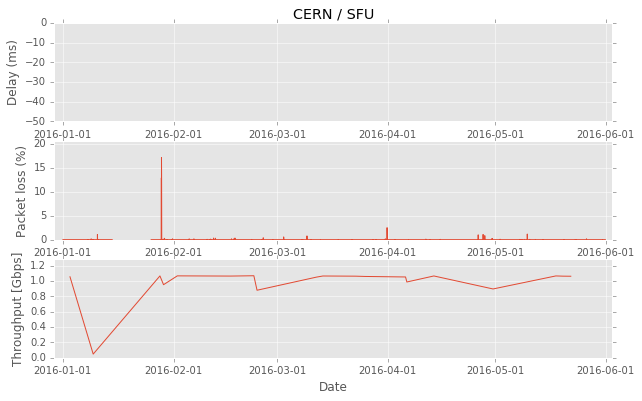

25.  CERN -> BEIJING


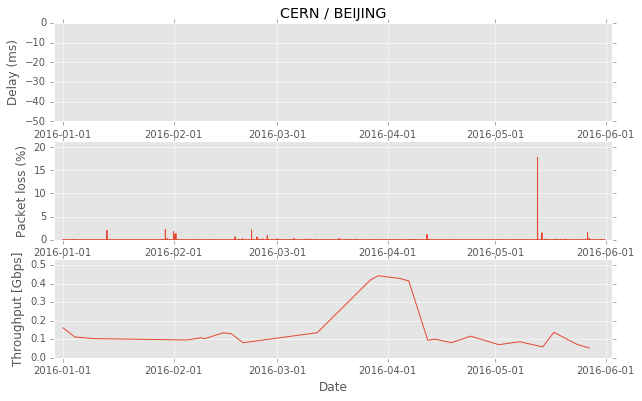

26.  BEIJING -> MWT2_a


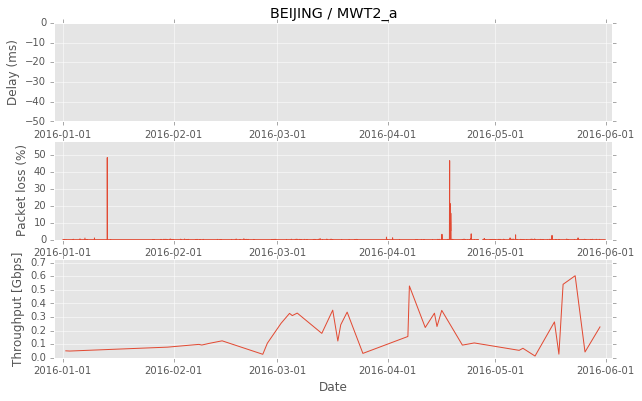

27.  BEIJING -> MWT2_b


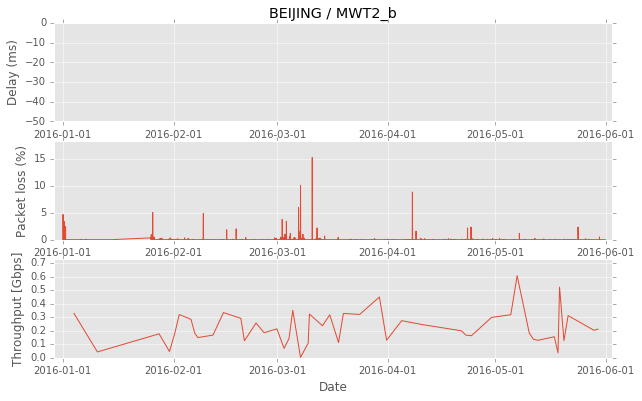

28.  BEIJING -> MWT2_c


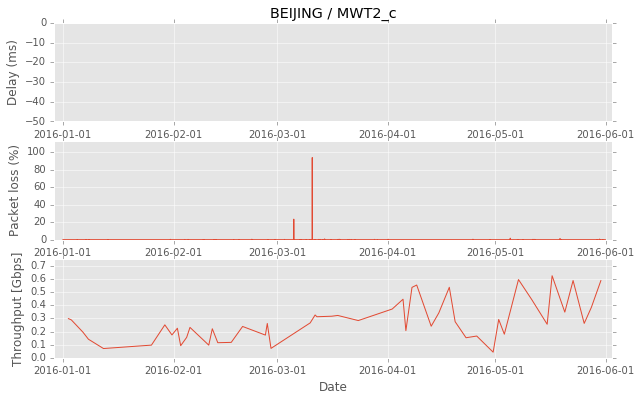

29.  BEIJING -> SFU


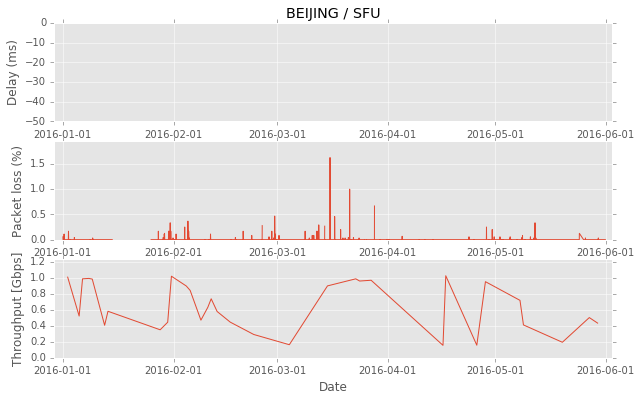

30.  BEIJING -> CERN


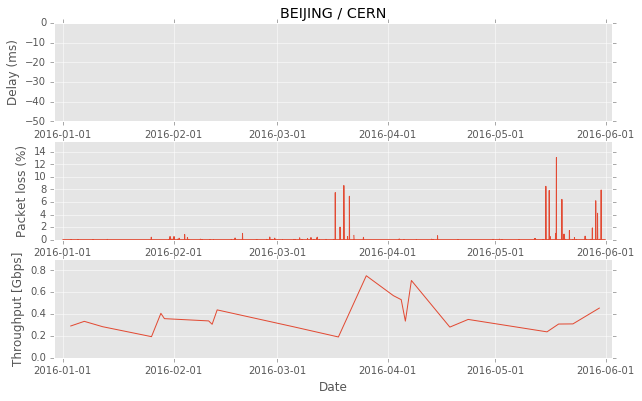

In [3]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            
            # Read in data
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            # To display x-axis labels
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            # Get the time series
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100.
            
            time_t = data_t.index
            tp = data_t.throughput / 1024. / 1024. / 1024.
            
            plt.figure(figsize=[10, 6])
            
            # Plot delay
            plt.subplot(3, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)')
            plt.ylabel('Delay (ms)')
            plt.ylim([-50, 0])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            # Plot packet loss
            plt.subplot(3, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            # Plot throughput
            plt.subplot(3, 1, 3)
            plt.plot(time_t, tp, label='throughput (Gbps)')
            plt.ylabel('Throughput [Gbps]')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            
            plt.show()

## Find out if the negative delay values occurs with any timing pattern

In [4]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            iso_time = data_lpl.iso_8601
            
            tt = iso_time.values
            dd = dm.values
            pp = pl.values
            
            for i in range(iso_time.size):
                if (dd[i] < 0.5):
                    print('{}        {}          {}'.format(tt[i], dd[i], pp[i]))
            
            print()
            print()
            print()
            

1.  MWT2_a -> MWT2_b
2016-02-11T20:25:00        -1.9          0.0
2016-02-11T20:45:00        -0.6          0.0
2016-02-15T20:55:00        -11.9          0.0
2016-02-15T21:05:00        -2.9          0.0
2016-02-15T21:25:00        -1.1          0.0
2016-02-15T21:50:00        -2.6          0.0
2016-02-15T22:00:00        -5.1          0.0
2016-02-15T22:05:00        -0.1          0.0
2016-02-15T22:20:00        -1.6          0.0
2016-02-15T22:30:00        -3.5          0.0
2016-02-15T22:50:00        -1.1          0.0
2016-03-14T10:25:00        -12.0          0.0
2016-03-14T10:30:00        -24.5          0.0
2016-03-14T11:30:00        -0.4          0.03333333333333333
2016-03-14T11:40:00        -2.6          0.0
2016-03-14T12:00:00        -4.7          0.0
2016-03-14T12:05:00        -5.5          0.0
2016-03-14T12:45:00        -1.7          0.0
2016-03-14T13:35:00        0.4          0.0
2016-03-14T13:55:00        -3.0          0.0
2016-03-14T14:40:00        -1.8          0.0
2016-03-14T15:55

## Begin to experiment with anomaly detection approaches

In [54]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']
time_window_length = 2 * 60 * 60 * 1000   # convert hours to ms
src_i = 0
dest_i = 4
data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
dm = data_lpl.delay_median
pl = data_lpl.packet_loss
threshold = 0.99
dm_abnormal_cutoff = dm.quantile(threshold, interpolation='midpoint')
pl_abnormal_cutoff = pl.quantile(threshold, interpolation='midpoint')

row = data_lpl.shape[0]
for r in range(row):
    line = data_lpl.iloc[r]
    if line['delay_median'] > dm_abnormal_cutoff:
        data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', 1)
    else:
        data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', 0)
    if line['packet_loss'] > pl_abnormal_cutoff:
        data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', 1)
    else:
        data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', 0)

In [55]:
data_lpl

iso_8601  delay_median  delay_mean   delay_sd  \
1451607300000  2016-01-01T00:15:00          52.9   52.921208   0.238459   
1451608800000  2016-01-01T00:40:00          52.9   53.140333   6.789114   
1451610000000  2016-01-01T01:00:00          53.0   53.144000   2.333466   
1451611500000  2016-01-01T01:25:00          53.3   53.993125  15.465952   
1451613000000  2016-01-01T01:50:00          53.4   53.778000   8.130812   
1451614200000  2016-01-01T02:10:00          53.6   53.667278   0.178299   
1451616300000  2016-01-01T02:45:00          53.1   53.165125   1.191786   
1451617800000  2016-01-01T03:10:00          53.7   53.797267   1.694717   
1451619600000  2016-01-01T03:40:00          53.4   53.677667   4.461614   
1451620800000  2016-01-01T04:00:00          53.5   53.593708   1.127378   
1451622300000  2016-01-01T04:25:00          53.4   53.538167   5.112064   
1451623800000  2016-01-01T04:50:00          53.6   53.749000   1.244106   
1451625000000  2016-01-01T05:10:00          53.3   53.749542   9.420594   
1451626500000  2016-01-01T05:35:00          53.4   53.469333   0.203943   
1451628000000  2016-01-01T06:00:00          53.6   53.641125   0.974442   
1451629500000  2016-01-01T06:25:00          53.6   53.752333   2.935787   
1451630700000  2016-01-01T06:45:00          53.6   53.707900   1.192024   
1451632500000  2016-01-01T07:15:00          53.3   53.303000   0.101773   
1451633700000  2016-01-01T07:35:00          53.2   53.209300   0.256483   
1451635200000  2016-01-01T08:00:00          53.1   53.181379   0.229902   
1451636700000  2016-01-01T08:25:00          53.2   53.810944  13.635014   
1451638200000  2016-01-01T08:50:00          53.4   53.841500   3.880863   
1451639700000  2016-01-01T09:15:00          53.2   53.213000   0.127401   
1451641200000  2016-01-01T09:40:00          53.3   53.417833   1.669045   
1451643000000  2016-01-01T10:10:00          53.2   56.145500  35.020654   
1451644800000  2016-01-01T10:40:00          53.2   53.267167   1.125969   
1451646300000  2016-01-01T11:05:00          53.2   53.259583   0.287996   
1451647500000  2016-01-01T11:25:00          53.2   53.296133   1.002343   
1451649300000  2016-01-01T11:55:00          53.3   53.332333   0.574402   
1451651100000  2016-01-01T12:25:00          53.3   53.348333   1.279090   
...                            ...           ...         ...        ...   
1464681600000  2016-05-31T08:00:00          52.8   52.886889   1.180101   
1464683700000  2016-05-31T08:35:00          53.1   53.181667   2.646204   
1464685200000  2016-05-31T09:00:00          53.1   53.897667  11.817040   
1464686700000  2016-05-31T09:25:00          53.2   53.439667   5.947963   
1464687900000  2016-05-31T09:45:00          53.2   53.201333   0.276704   
1464689100000  2016-05-31T10:05:00          53.4   53.437000   0.953440   
1464690300000  2016-05-31T10:25:00          53.0   53.068333   0.472102   
1464692100000  2016-05-31T10:55:00          53.0   55.411667  29.858606   
1464693300000  2016-05-31T11:15:00          53.1   53.313792   5.331016   
1464694500000  2016-05-31T11:35:00          53.1   53.141458   0.163968   
1464696000000  2016-05-31T12:00:00          53.0   53.365000   7.728851   
1464697500000  2016-05-31T12:25:00          52.9   52.902722   0.340911   
1464701100000  2016-05-31T13:25:00          52.6   52.606000   0.294755   
1464702900000  2016-05-31T13:55:00          52.7   52.787500   1.063780   
1464704400000  2016-05-31T14:20:00          52.7   52.708833   0.218644   
1464706800000  2016-05-31T15:00:00          53.0   53.187750   3.859183   
1464708300000  2016-05-31T15:25:00          53.0   53.073833   0.268450   
1464709800000  2016-05-31T15:50:00          53.0   53.134467   2.730913   
1464711300000  2016-05-31T16:15:00          53.2   54.383467  17.802776   
1464712800000  2016-05-31T16:40:00          53.1   54.325000  18.657790   
1464714600000  2016-05-31T17:10:00          53.3   53.269750   0.122379   
1464716100000  2016-05-31T17:35:00          53.2   

1.  MWT2_a -> MWT2_b


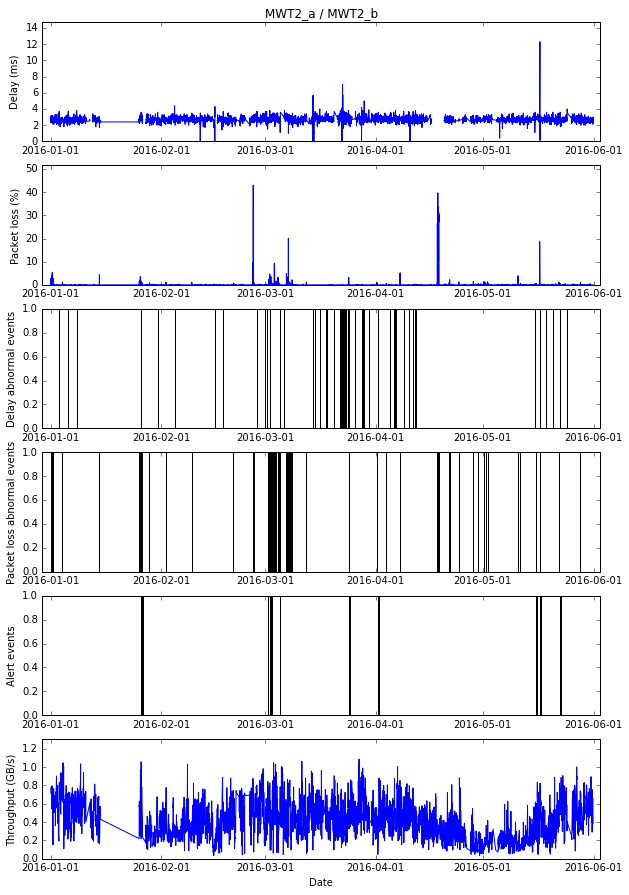

2.  MWT2_a -> MWT2_c


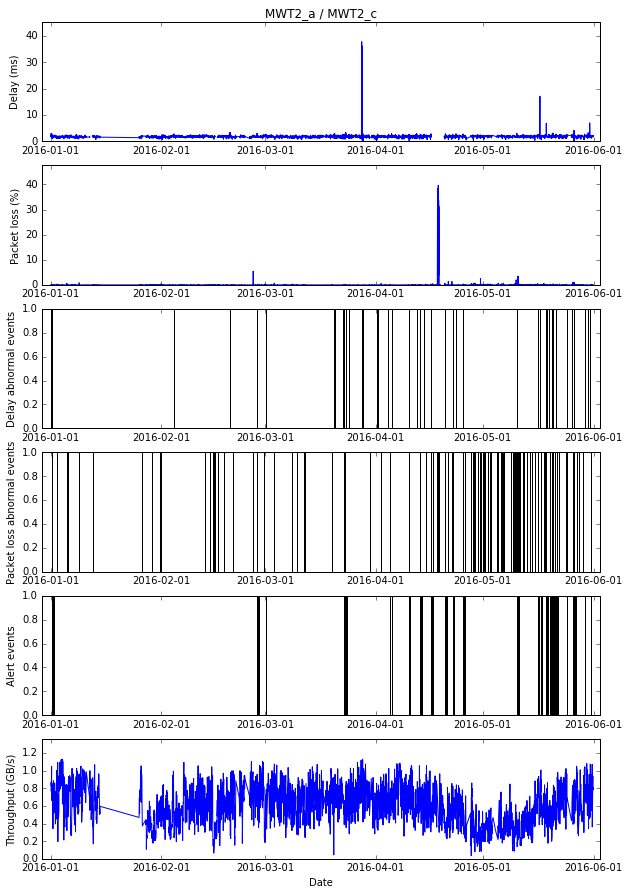

3.  MWT2_a -> SFU


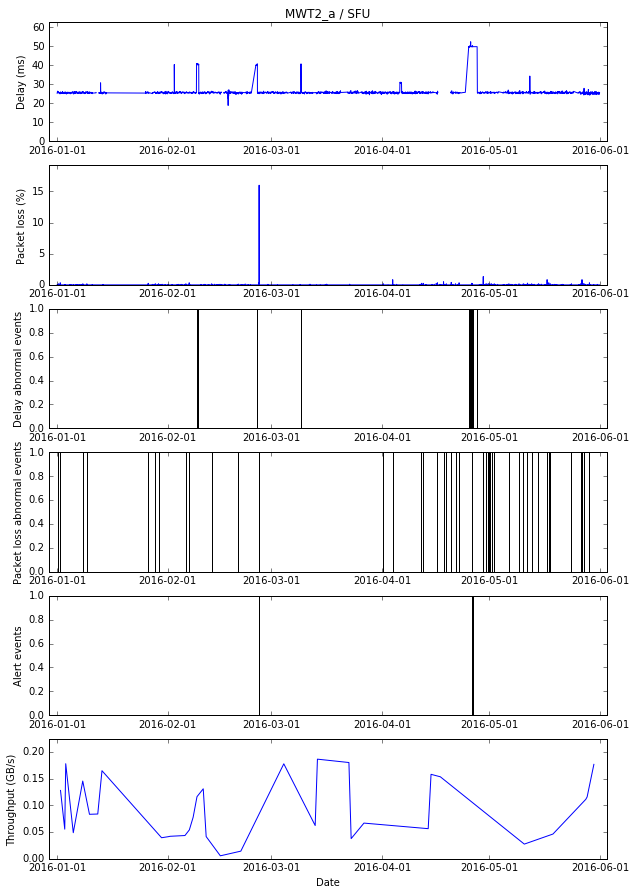

4.  MWT2_a -> CERN


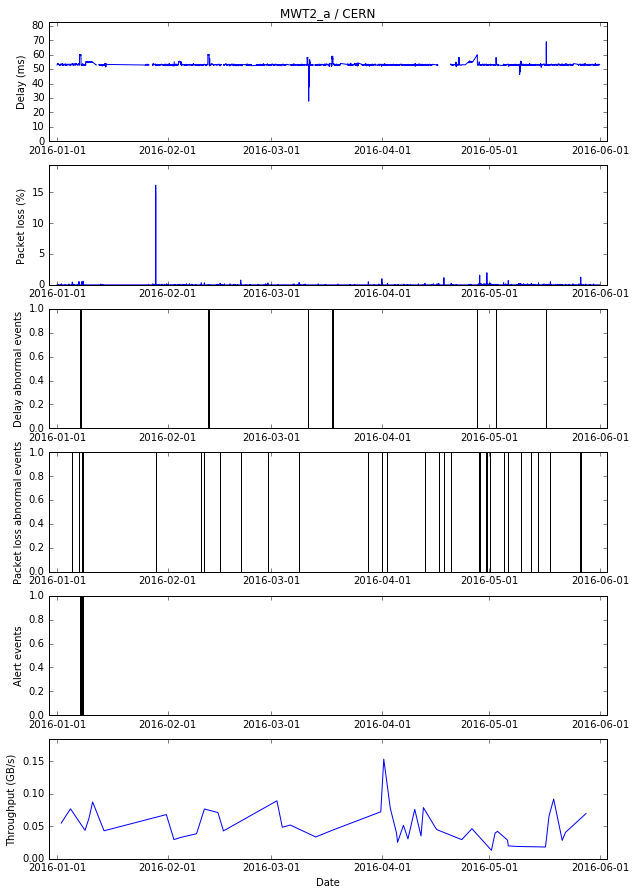

5.  MWT2_a -> BEIJING


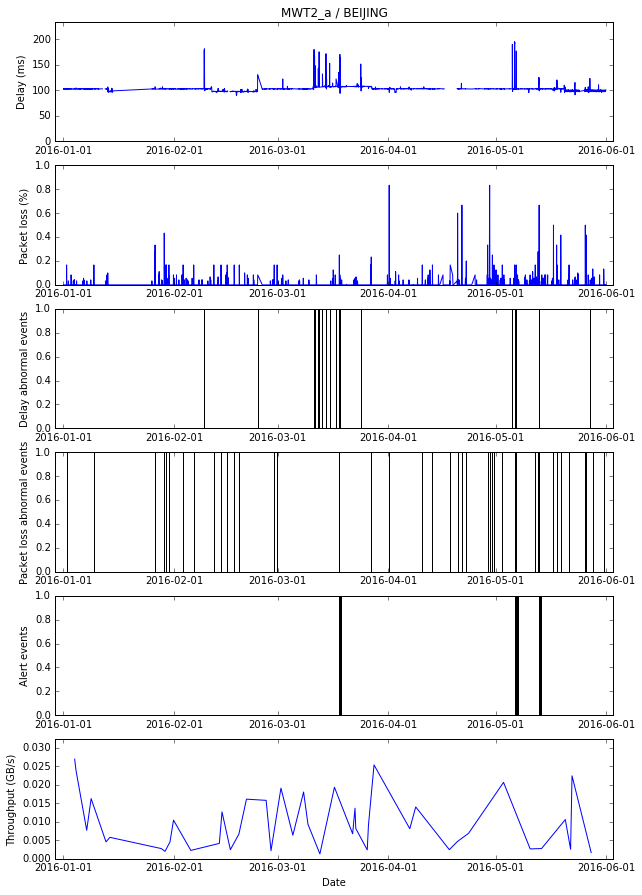

6.  MWT2_b -> MWT2_a


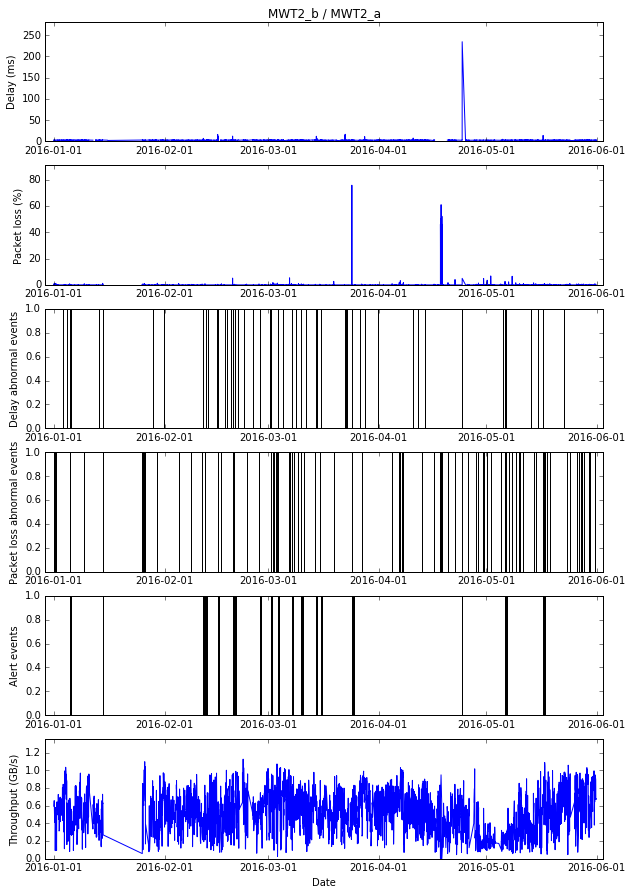

7.  MWT2_b -> MWT2_c


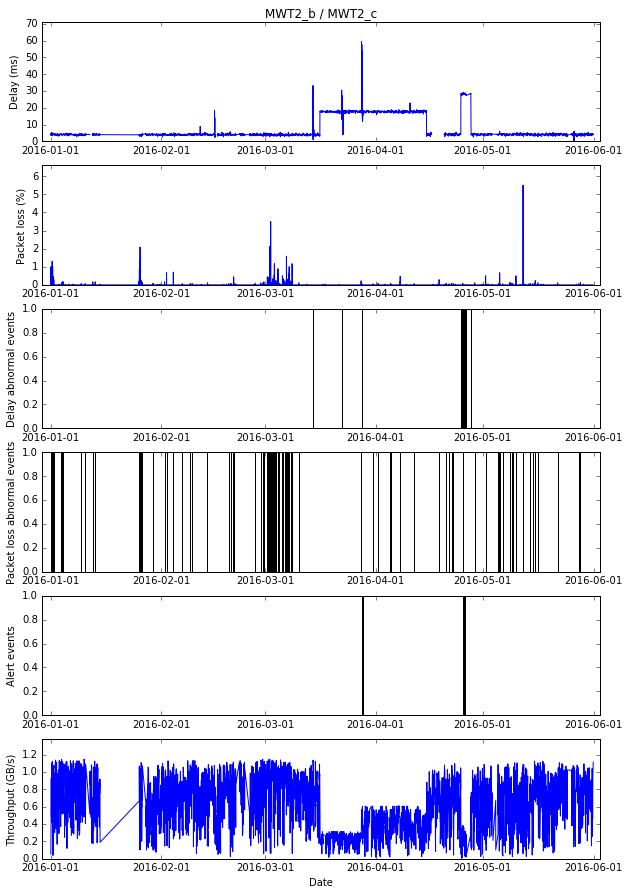

8.  MWT2_b -> SFU


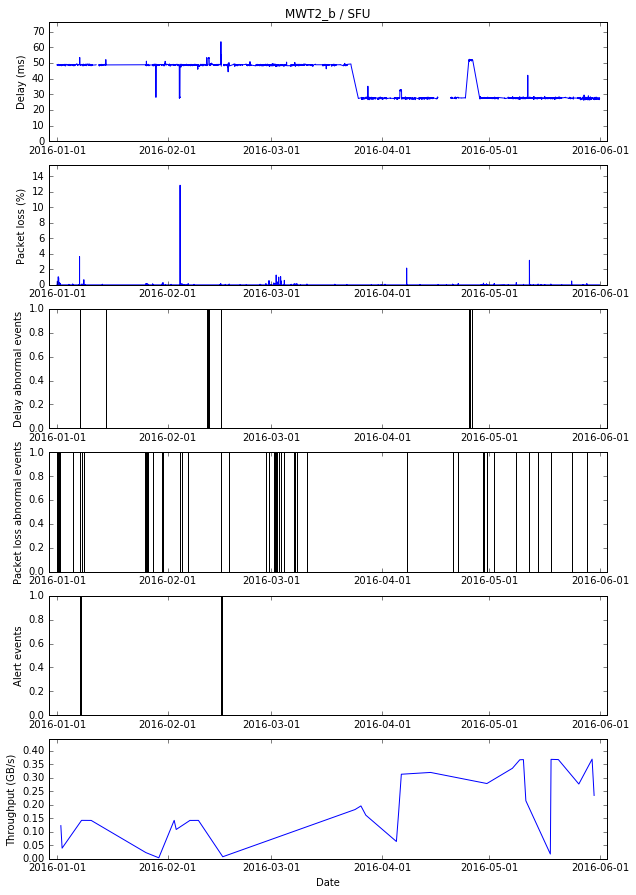

9.  MWT2_b -> CERN


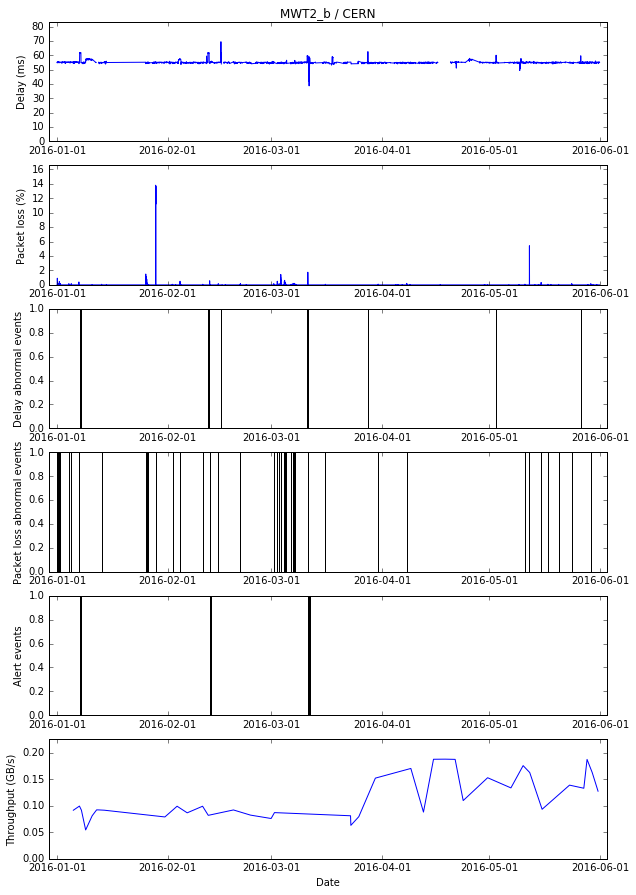

10.  MWT2_b -> BEIJING


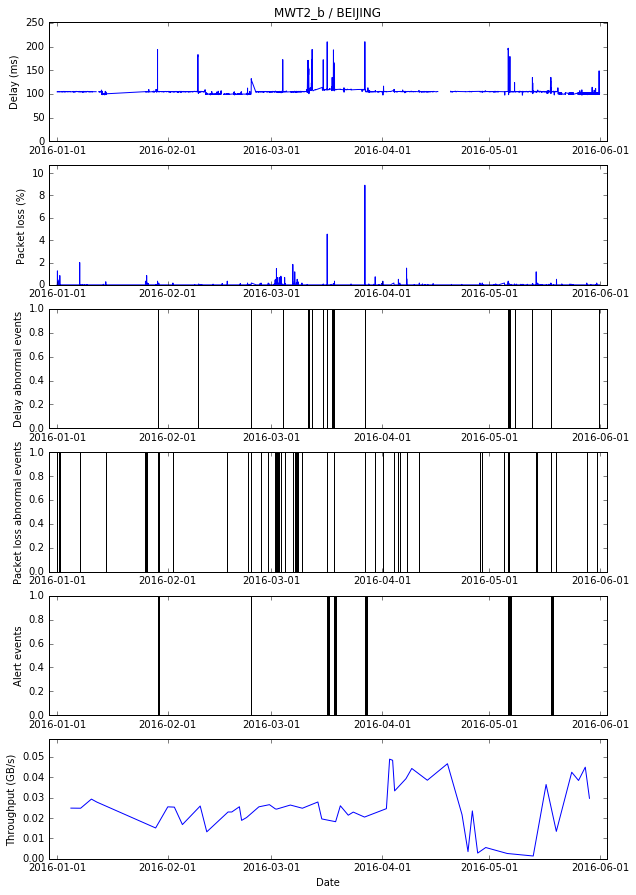

11.  MWT2_c -> MWT2_a


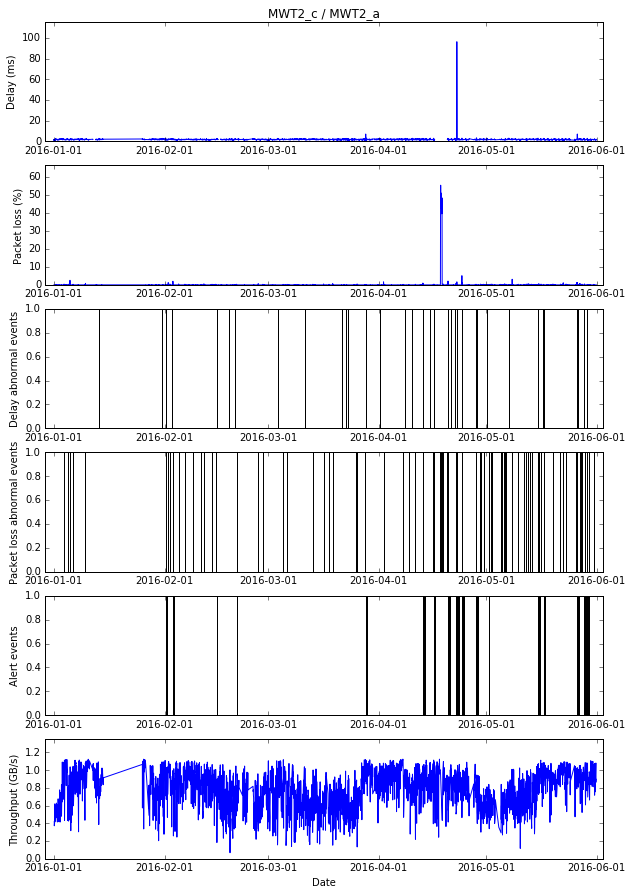

12.  MWT2_c -> MWT2_b


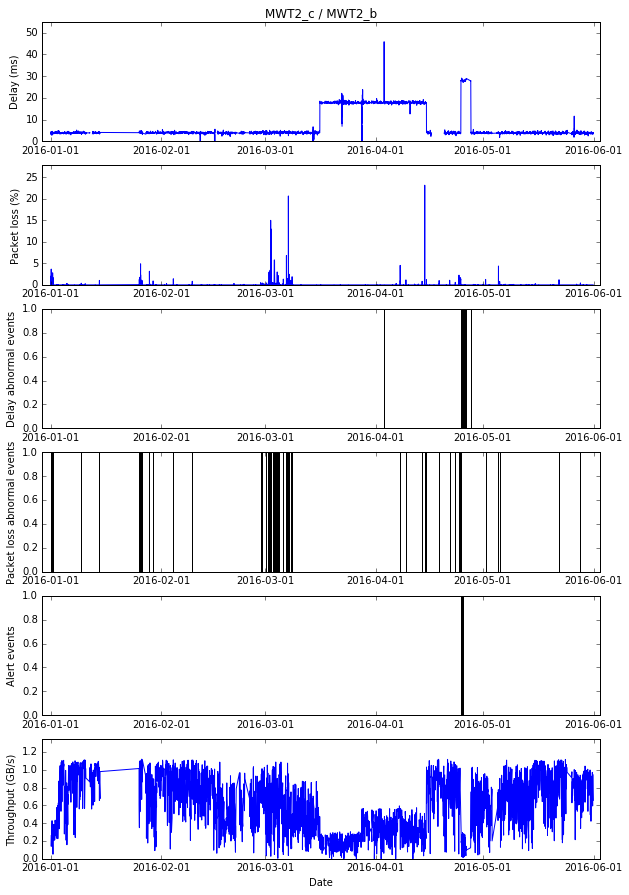

13.  MWT2_c -> SFU


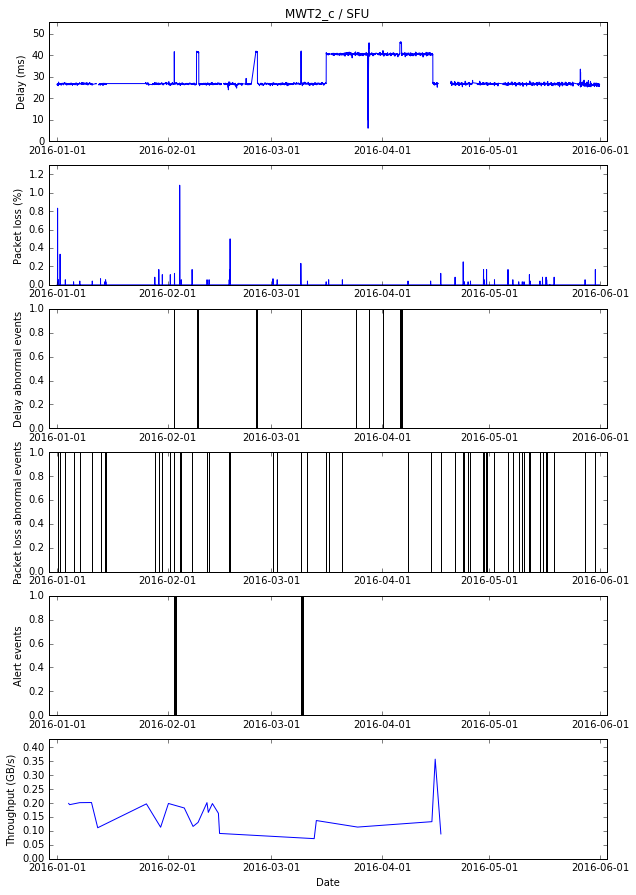

14.  MWT2_c -> CERN


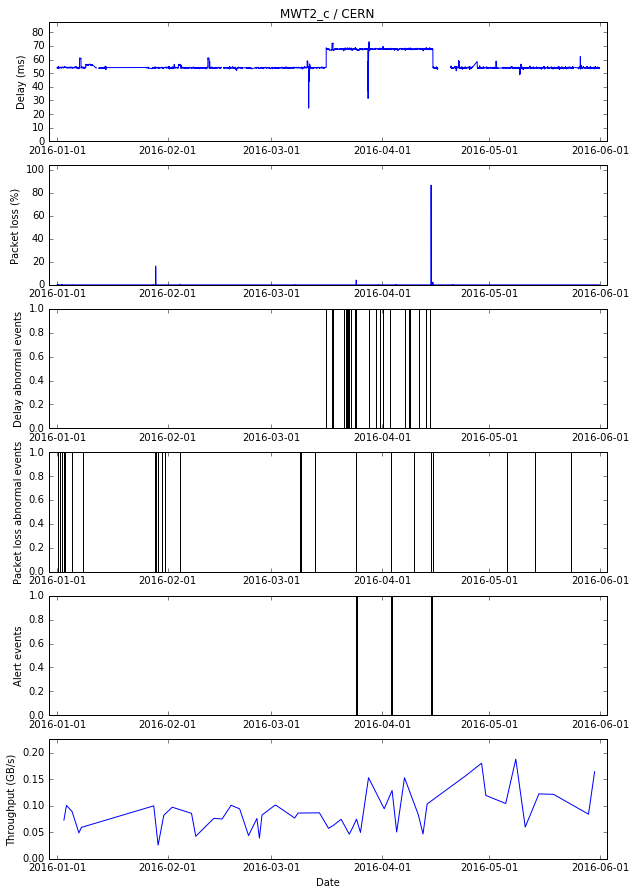

15.  MWT2_c -> BEIJING


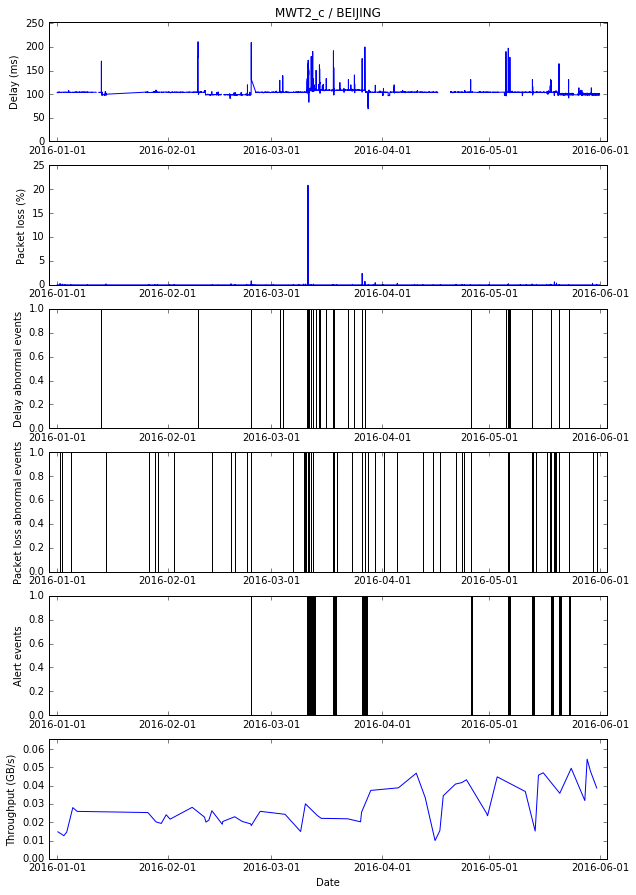

16.  SFU -> MWT2_a


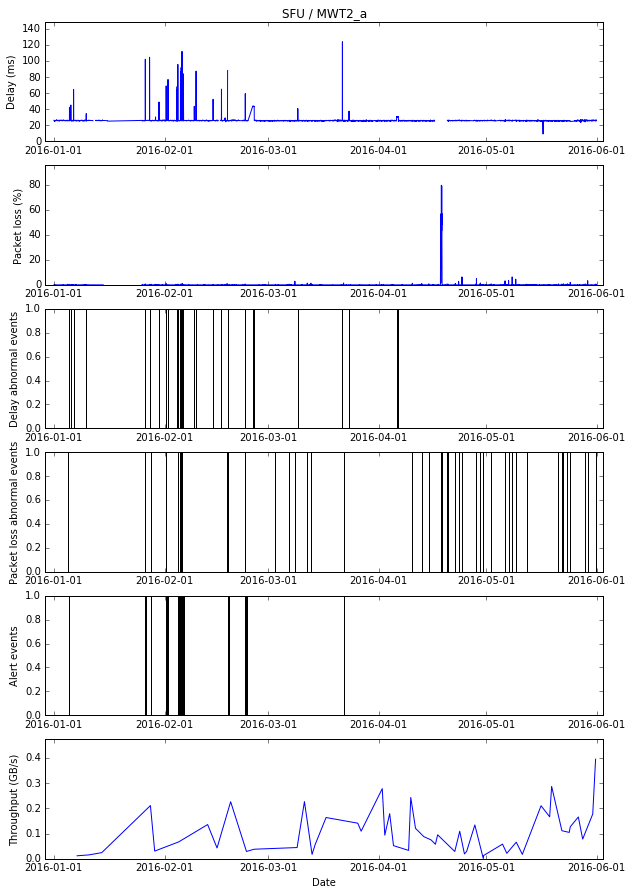

17.  SFU -> MWT2_b


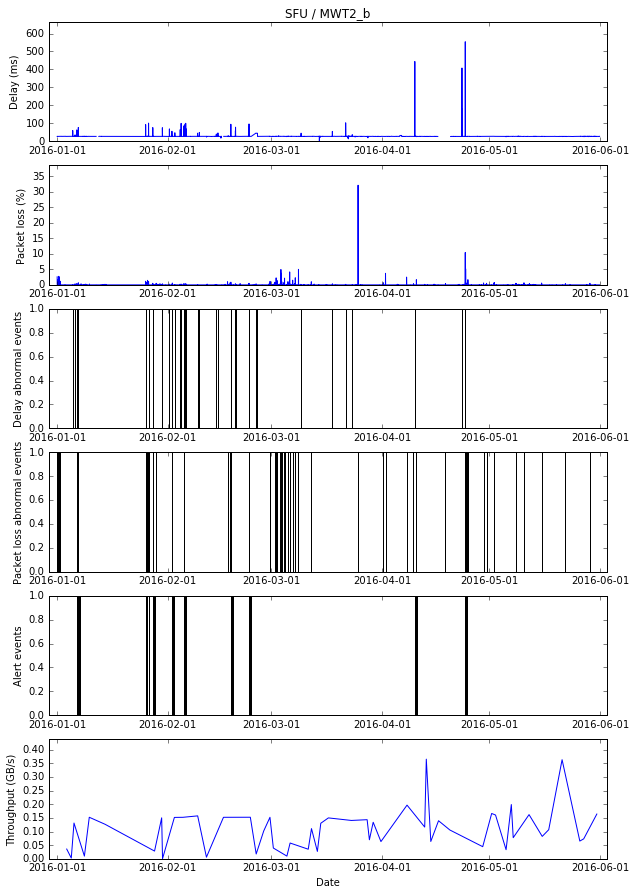

18.  SFU -> MWT2_c


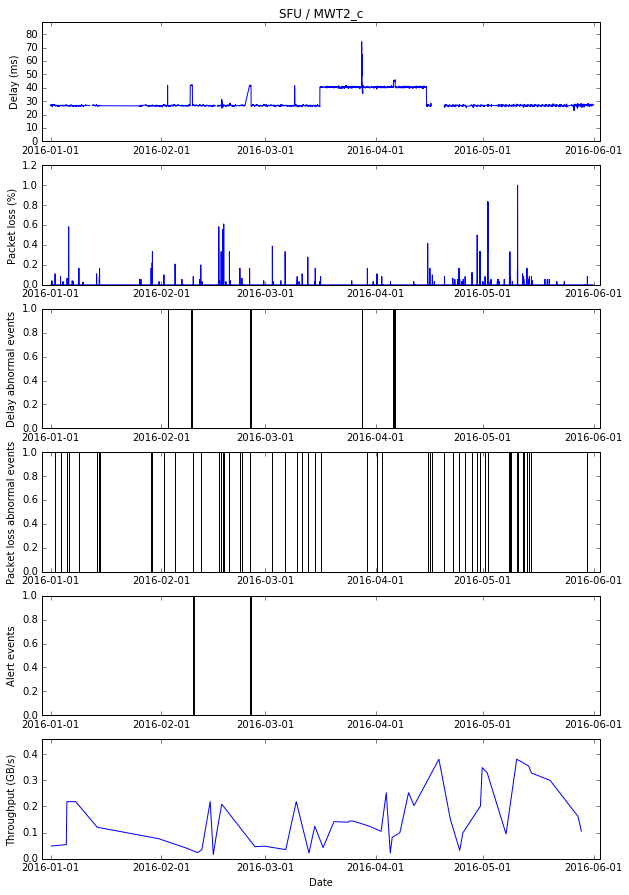

19.  SFU -> CERN


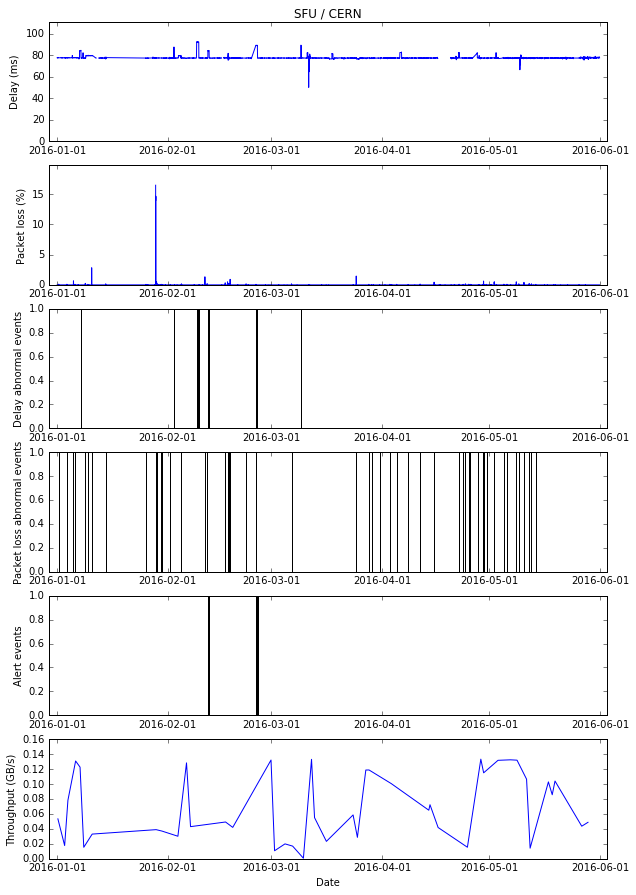

20.  SFU -> BEIJING


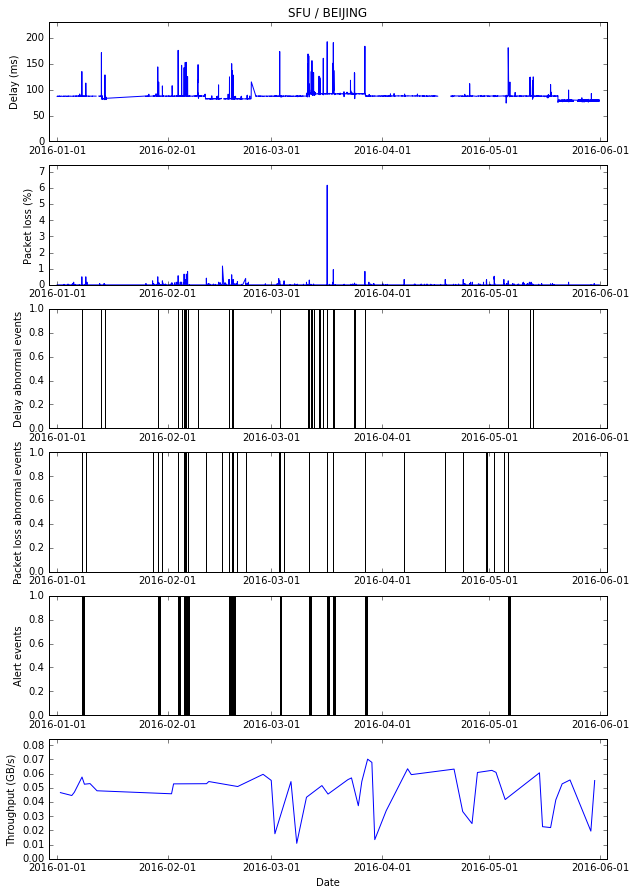

21.  CERN -> MWT2_a


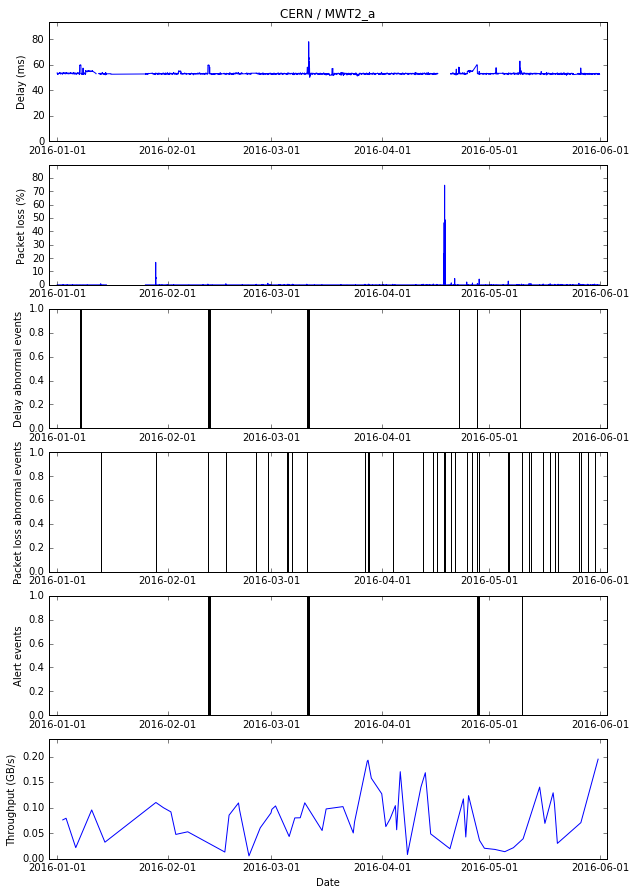

22.  CERN -> MWT2_b


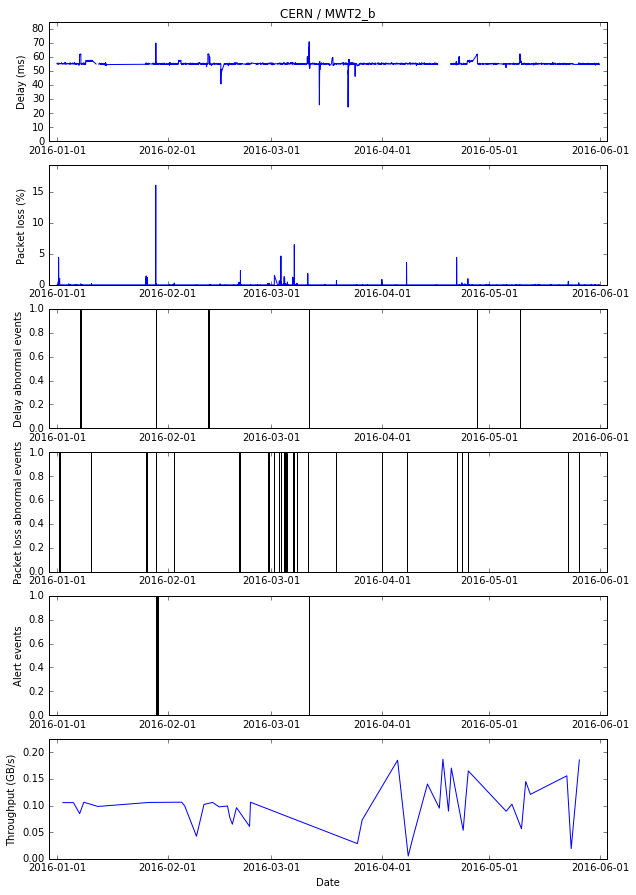

23.  CERN -> MWT2_c


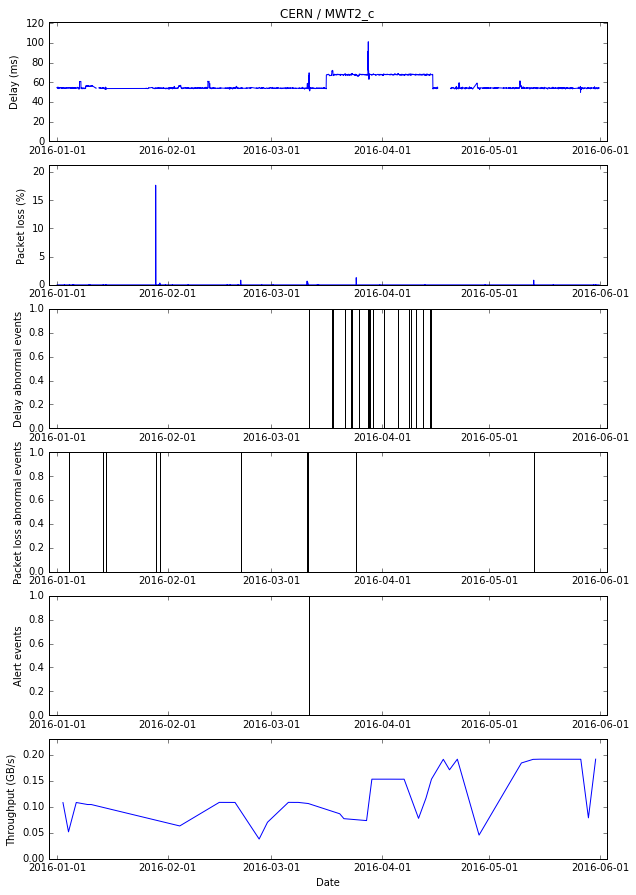

24.  CERN -> SFU


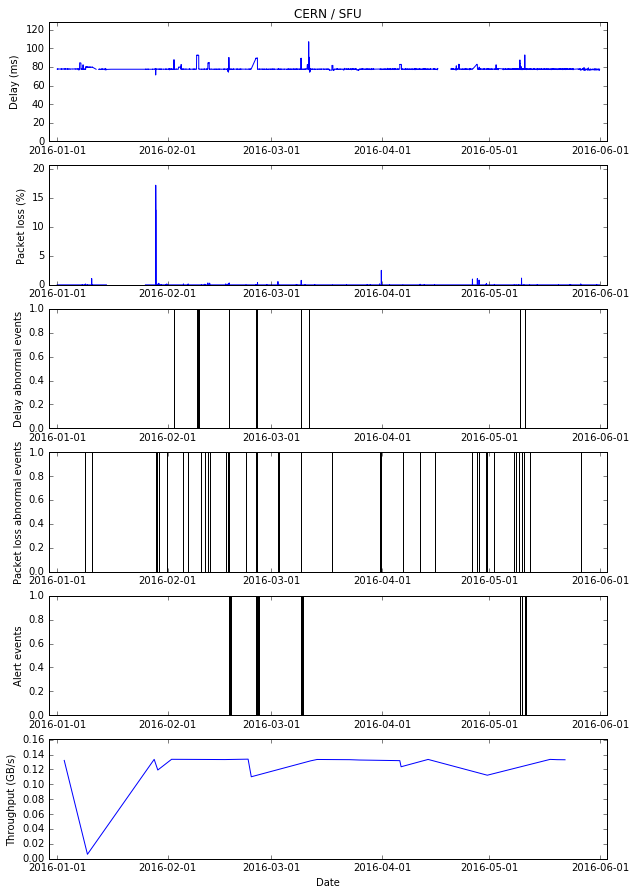

25.  CERN -> BEIJING


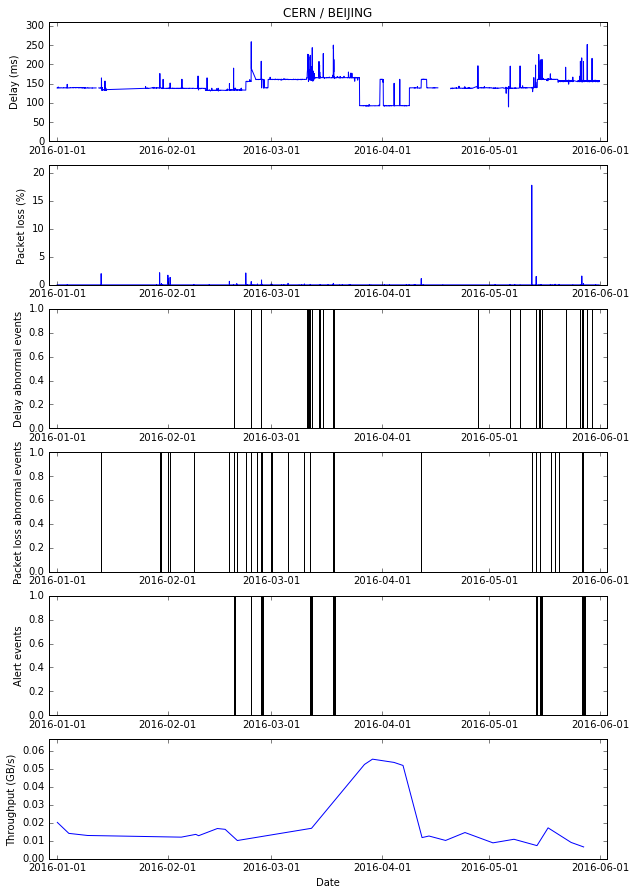

26.  BEIJING -> MWT2_a


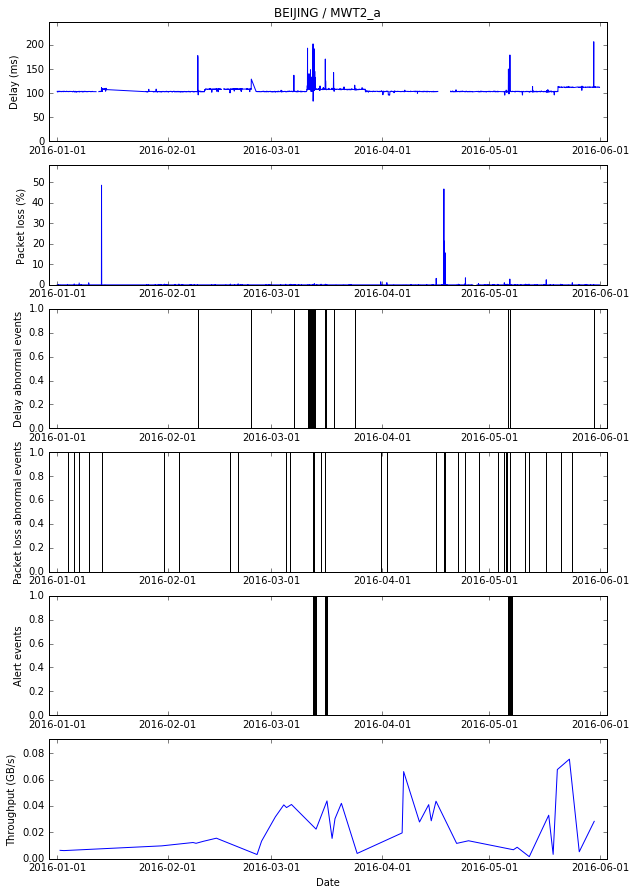

27.  BEIJING -> MWT2_b


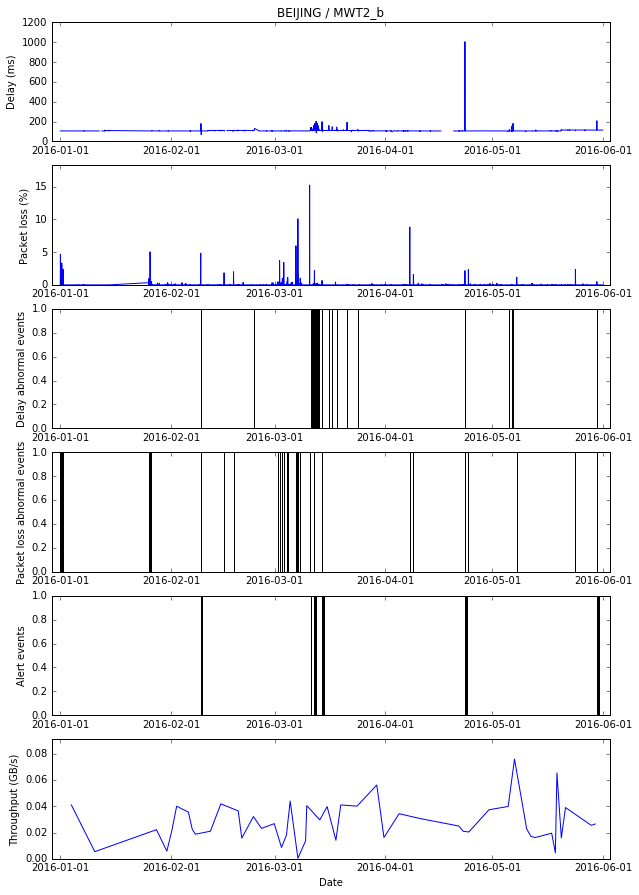

28.  BEIJING -> MWT2_c


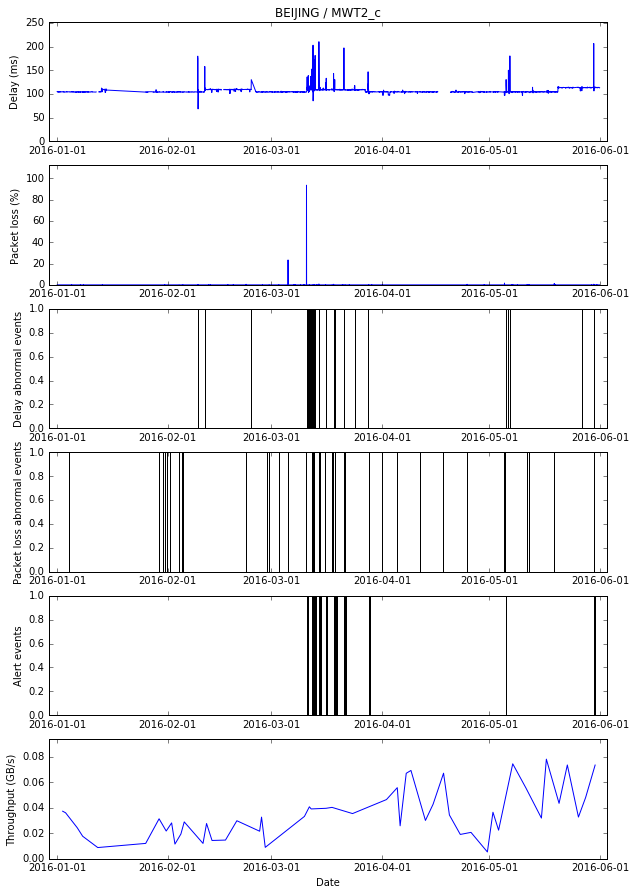

29.  BEIJING -> SFU


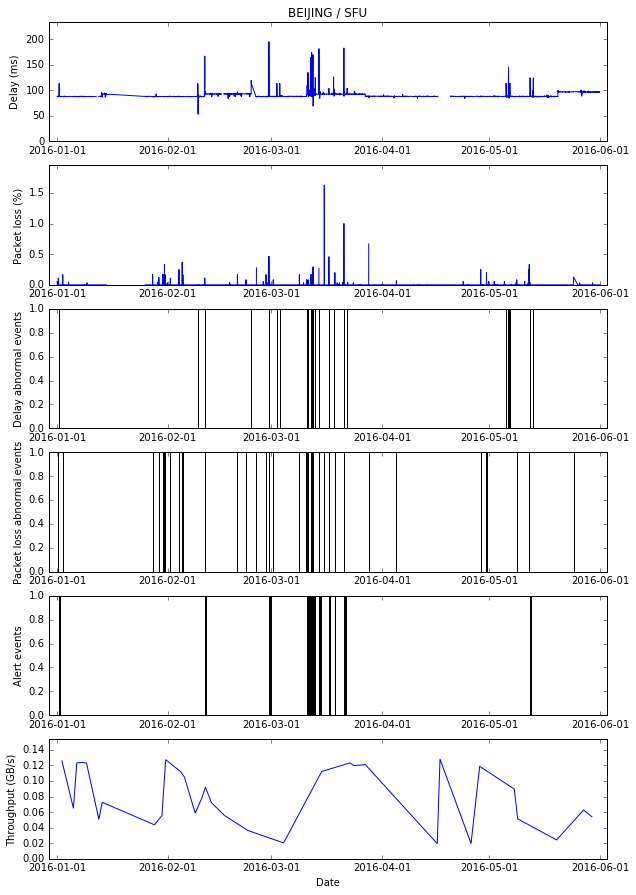

30.  BEIJING -> CERN


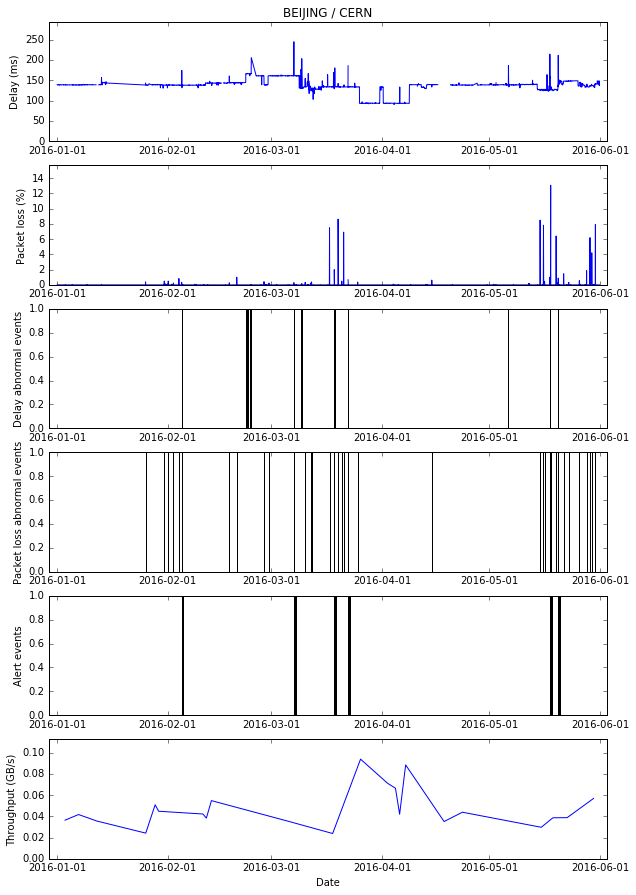

In [81]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            time_window_length = 12 * 60 * 60 * 1000   # 12 hours, half a day, convert hours to ms
            threshold = 0.99
            dm_abnormal_cutoff = dm.quantile(threshold, interpolation='midpoint')
            pl_abnormal_cutoff = pl.quantile(threshold, interpolation='midpoint')
            
            set_abnormal_dm = set()
            set_abnormal_pl = set()
            set_alert = set()
            
            row = data_lpl.shape[0]
            for r in range(row):
                line = data_lpl.iloc[r]
                if line['delay_median'] > dm_abnormal_cutoff:
                    data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', True)
                    set_abnormal_dm.add(data_lpl.index[r])
                else:
                    data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', False)
                if line['packet_loss'] * 100 > pl_abnormal_cutoff:
                    data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', True)
                    set_abnormal_pl.add(data_lpl.index[r])
                else:
                    data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', False)
            
            row = data_lpl.shape[0]
            for r in range(row):
                temp_a = data_lpl[data_lpl.index <= data_lpl.index[r]]
                temp_b = temp_a[temp_a.index >= (data_lpl.index[r] - time_window_length)]
                if ( temp_b.delay_abnormal[temp_b.delay_abnormal > .5].shape[0] >= 1 ) and ( temp_b.packet_loss_abnormal[temp_b.packet_loss_abnormal > .5].shape[0] >= 1 ):
                    set_alert.add(data_lpl.index[r])
            
            plt.figure(figsize=[10, 15])
            
            plt.subplot(6, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)')
            plt.ylabel('Delay (ms)')
            plt.ylim([0, dm.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(6, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(6, 1, 3)
            for t in set_abnormal_dm:
                plt.axvline(x=t, ymin=0, ymax=1, color='k')
            plt.ylabel('Delay abnormal events')
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(6, 1, 4)
            for t in set_abnormal_pl:
                plt.axvline(x=t, ymin=0, ymax=1, color='k')
            plt.ylabel('Packet loss abnormal events')
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(6, 1, 5)
            for t in set_alert:
                plt.axvline(x=t, ymin=0, ymax=1, color='k')
            plt.ylabel('Alert events')
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(6, 1, 6)
            plt.plot(time_t, tp, label='throughput (GB/s)')
            plt.ylabel('Throughput (GB/s)')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            
            plt.show()

1.  MWT2_a -> MWT2_b


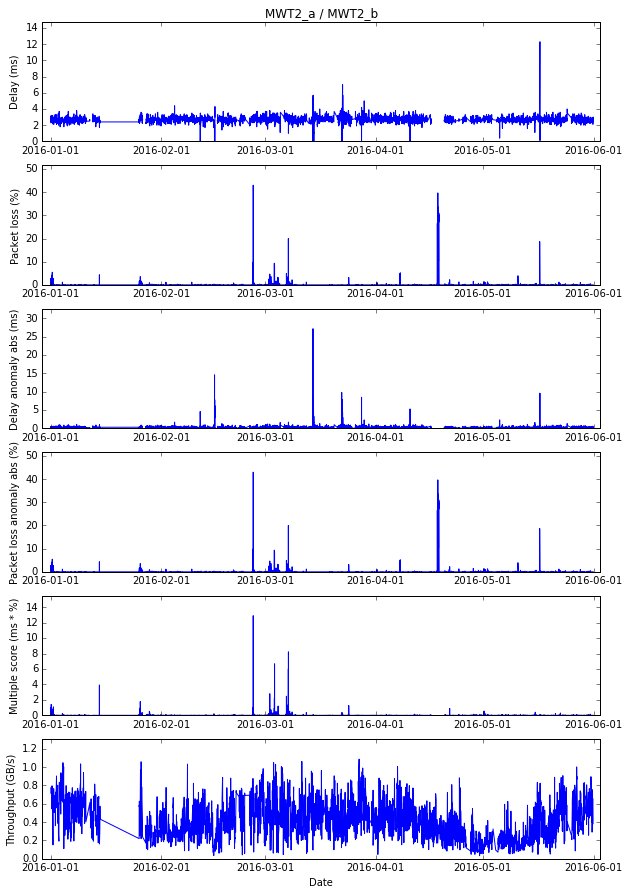

2.  MWT2_a -> MWT2_c


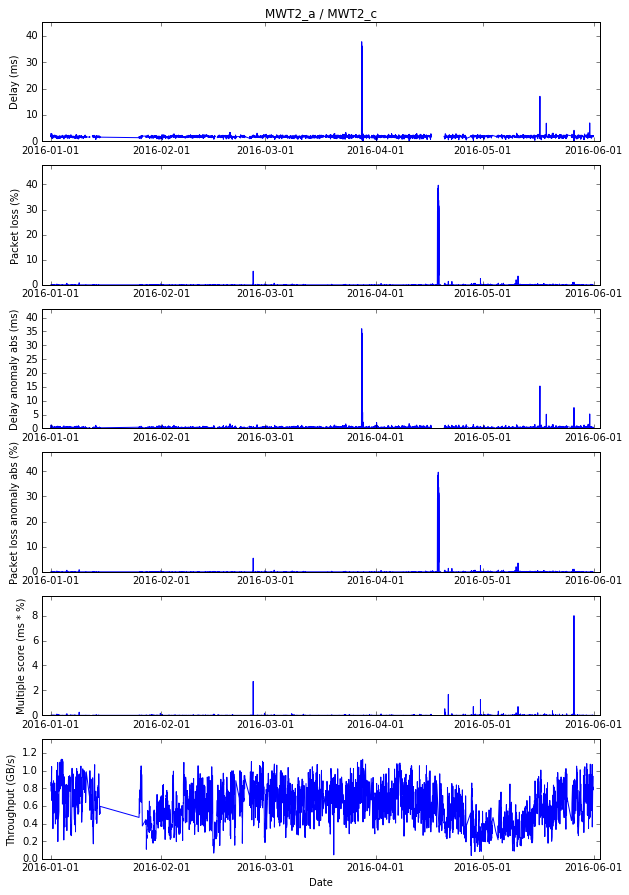

3.  MWT2_a -> SFU


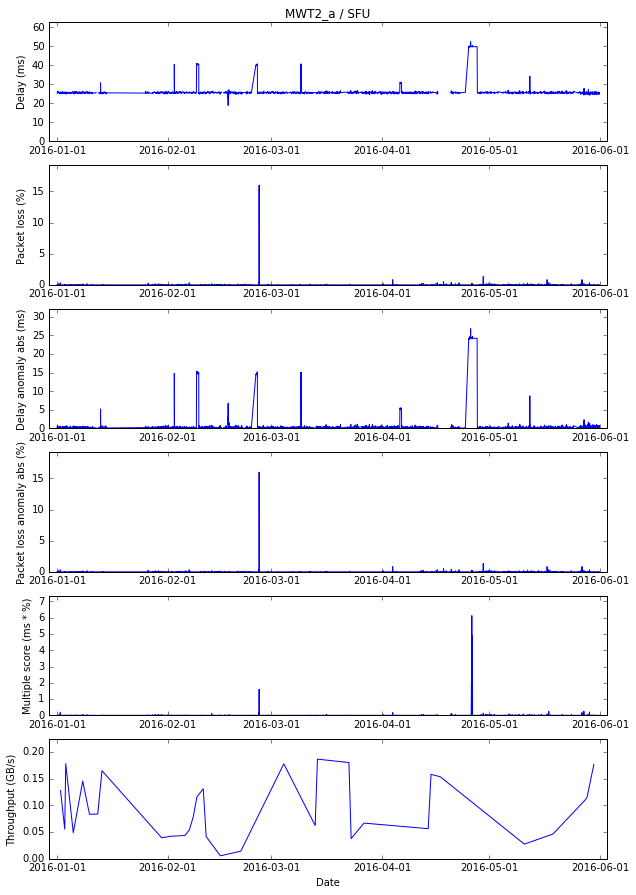

4.  MWT2_a -> CERN


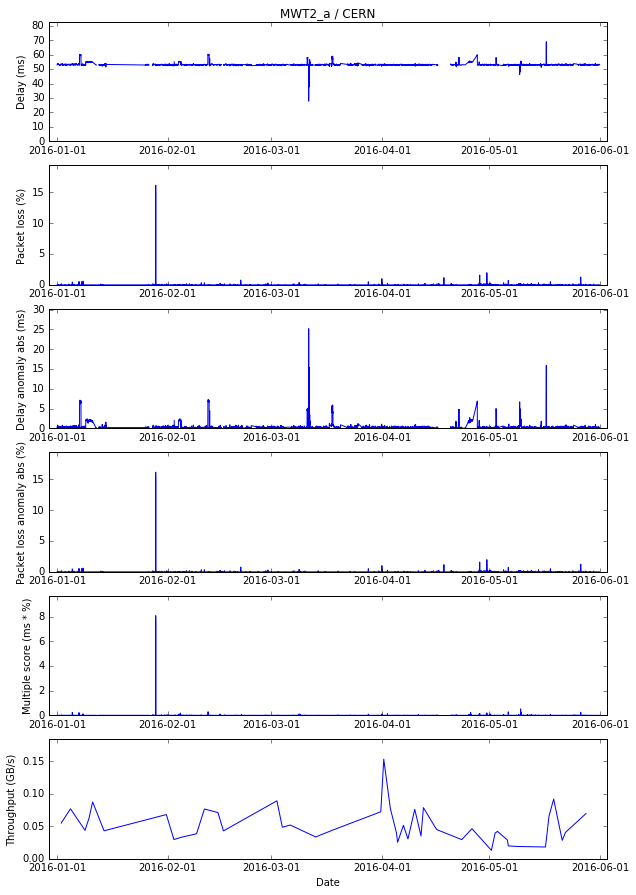

5.  MWT2_a -> BEIJING


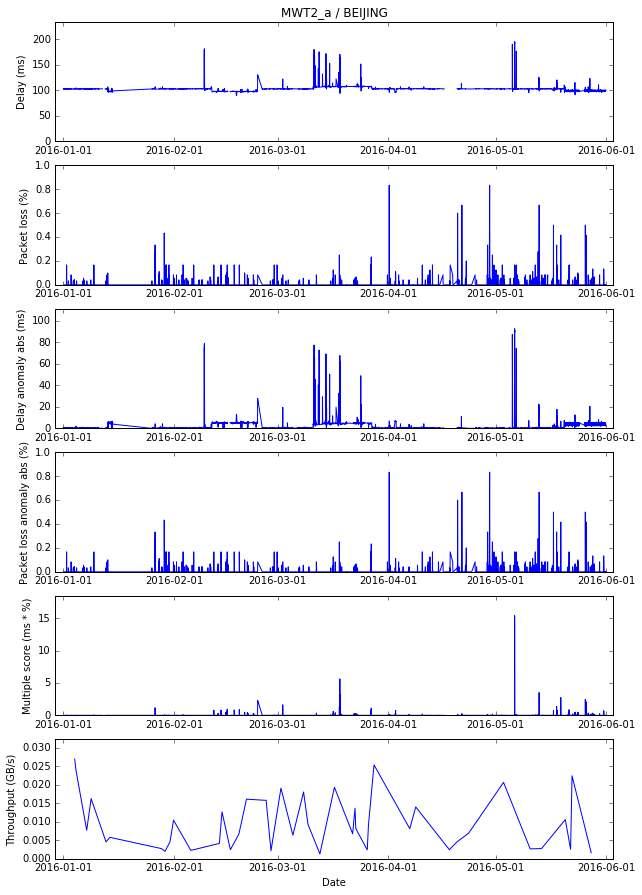

6.  MWT2_b -> MWT2_a


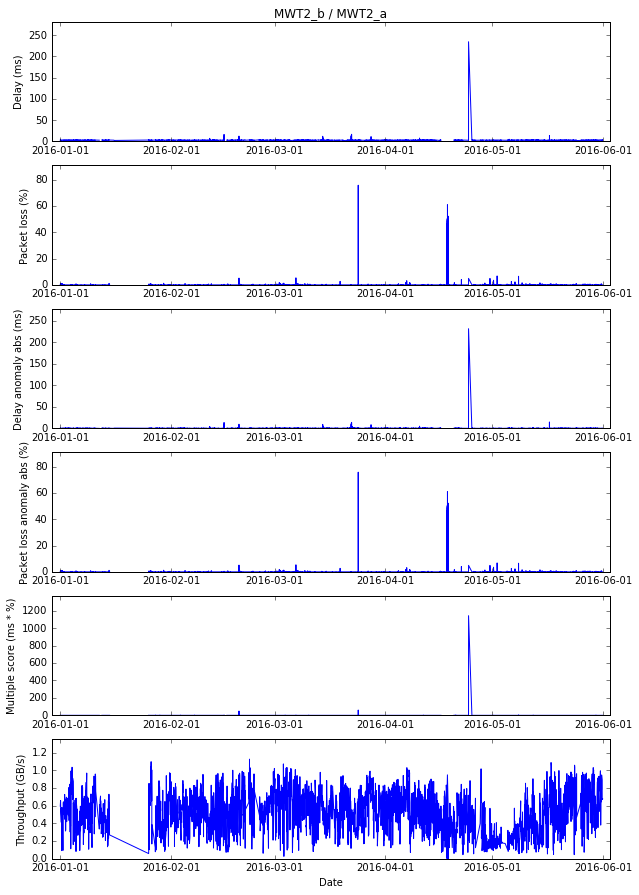

7.  MWT2_b -> MWT2_c


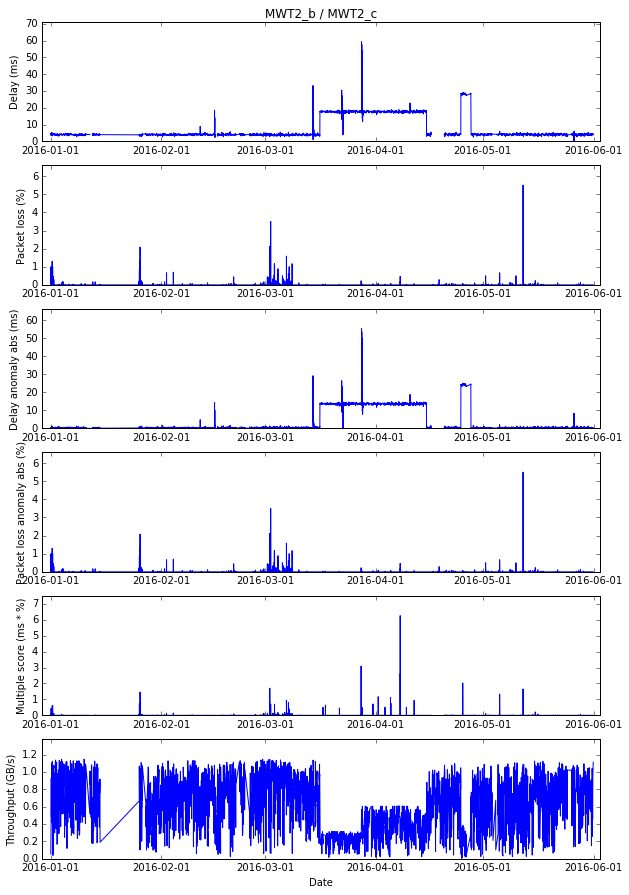

8.  MWT2_b -> SFU


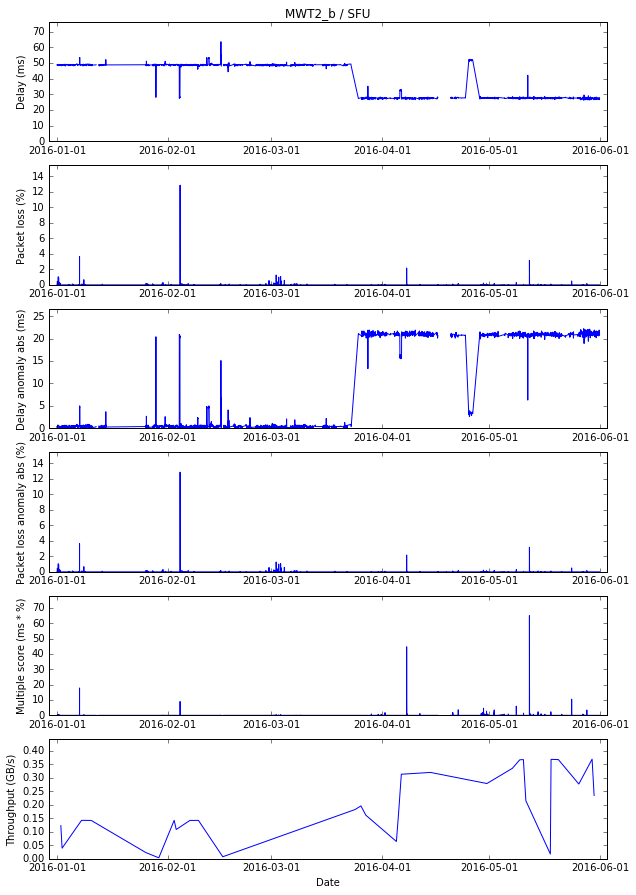

9.  MWT2_b -> CERN


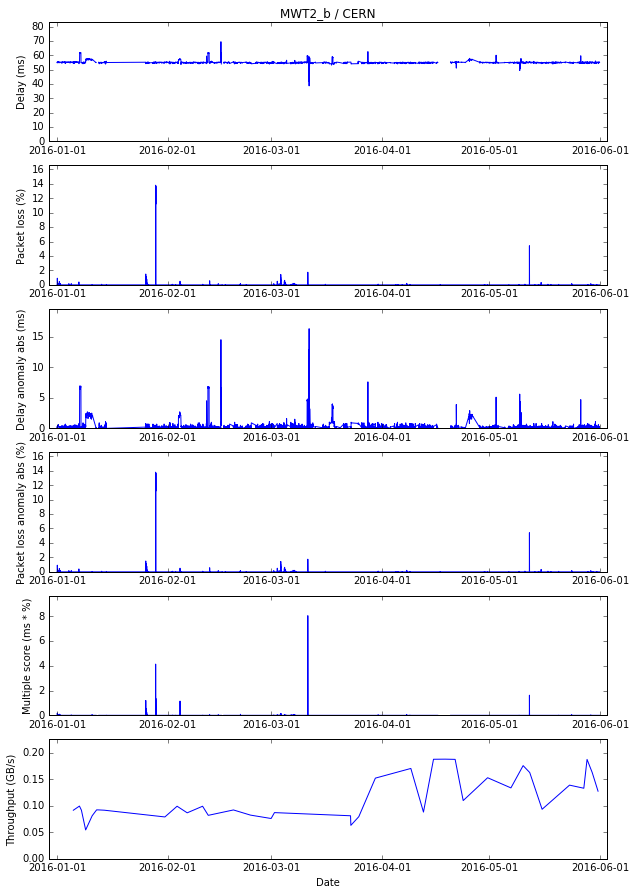

10.  MWT2_b -> BEIJING


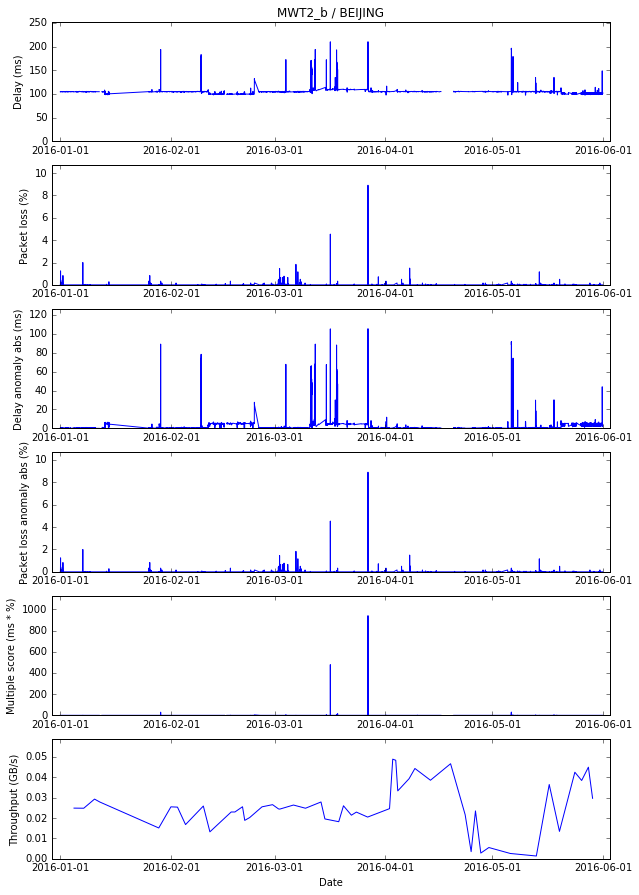

11.  MWT2_c -> MWT2_a


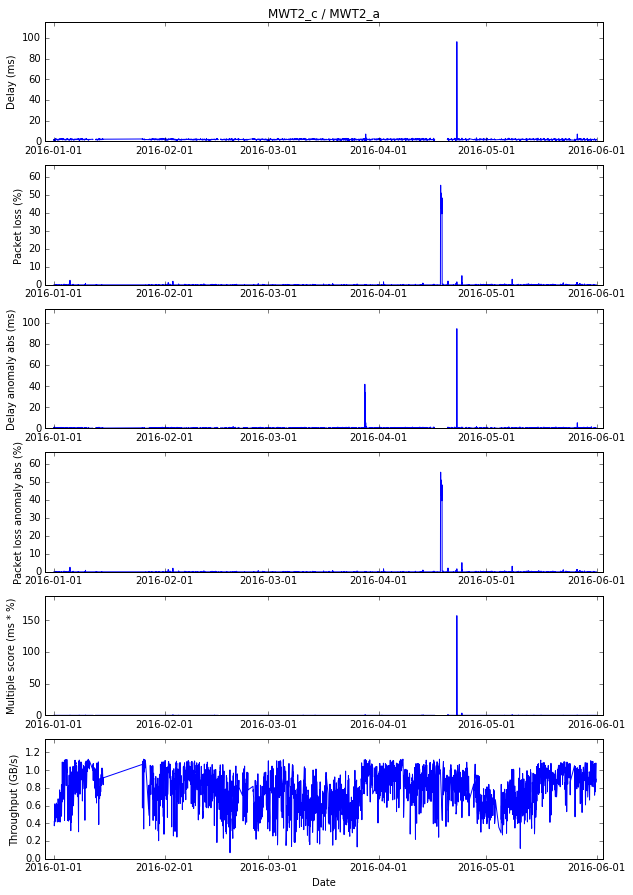

12.  MWT2_c -> MWT2_b


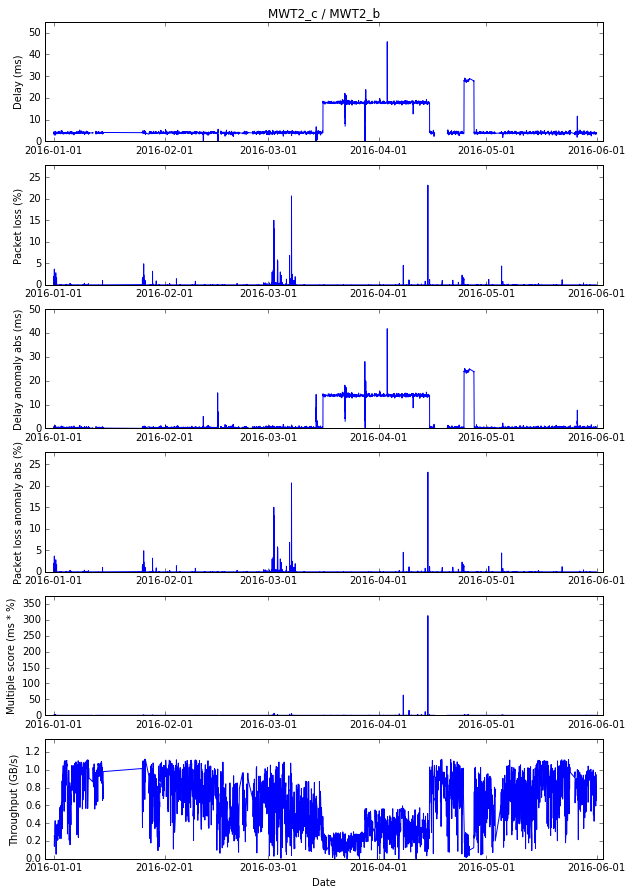

13.  MWT2_c -> SFU


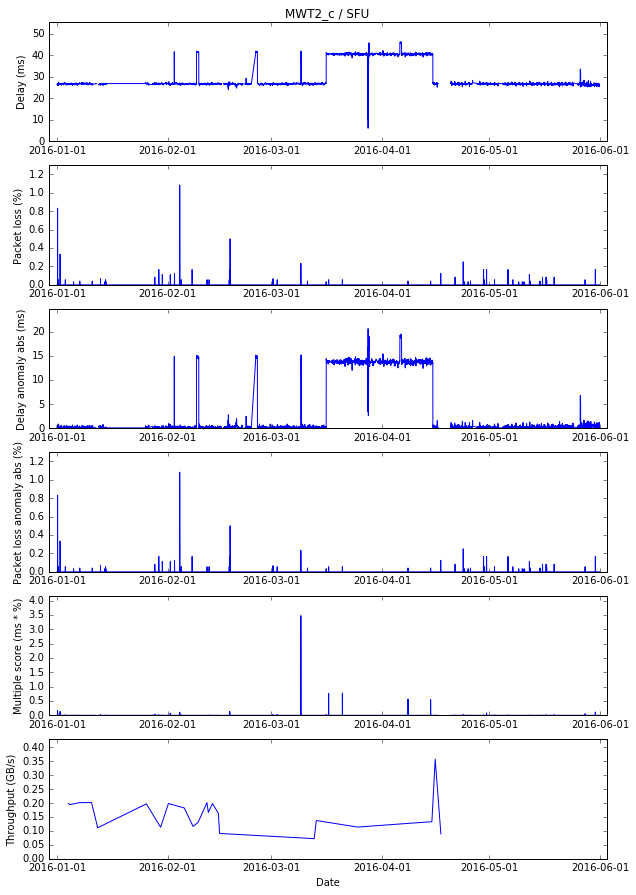

14.  MWT2_c -> CERN


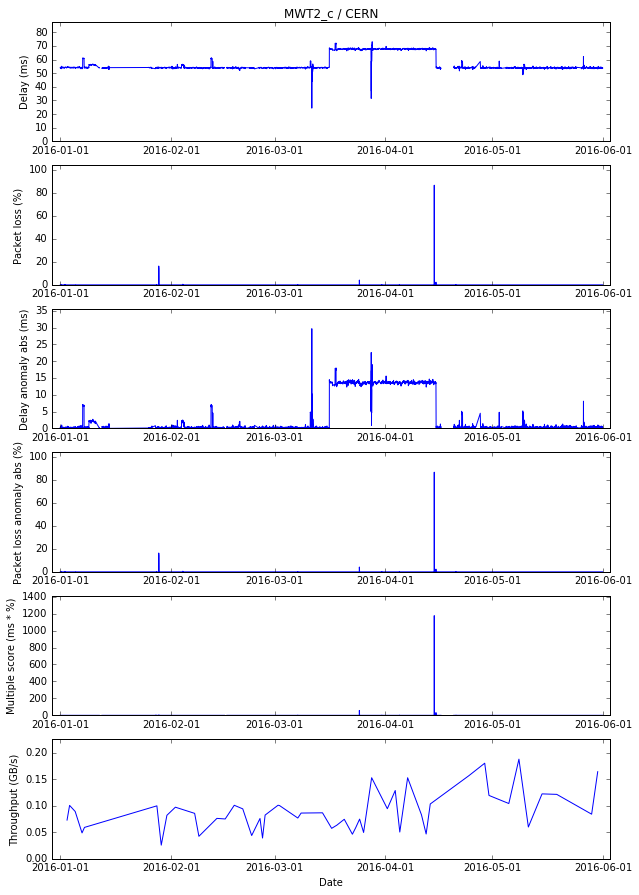

15.  MWT2_c -> BEIJING


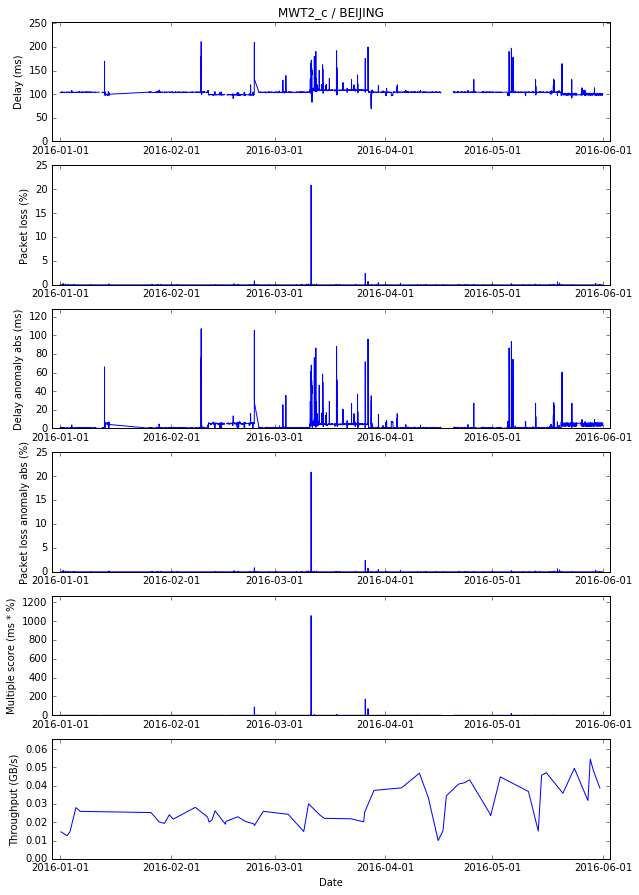

16.  SFU -> MWT2_a


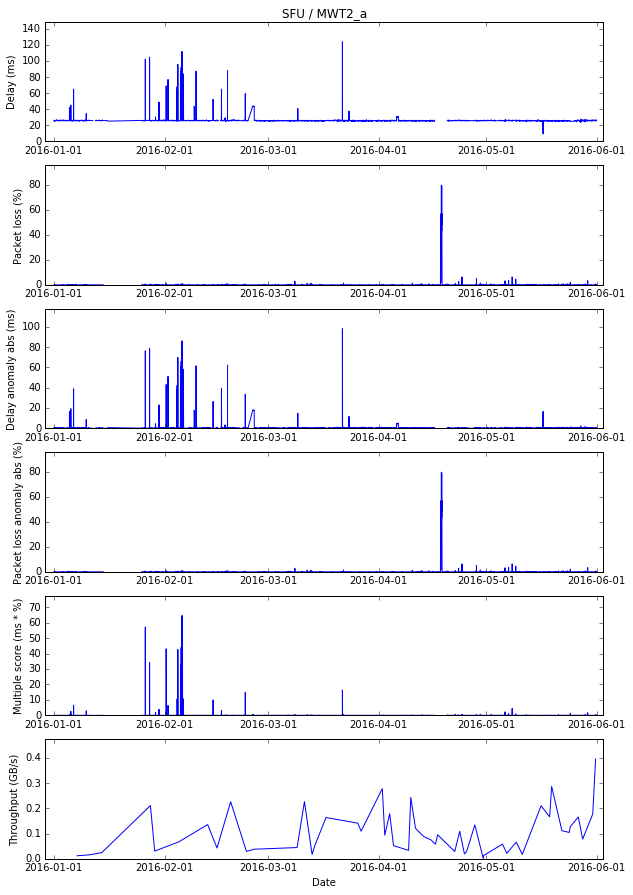

17.  SFU -> MWT2_b


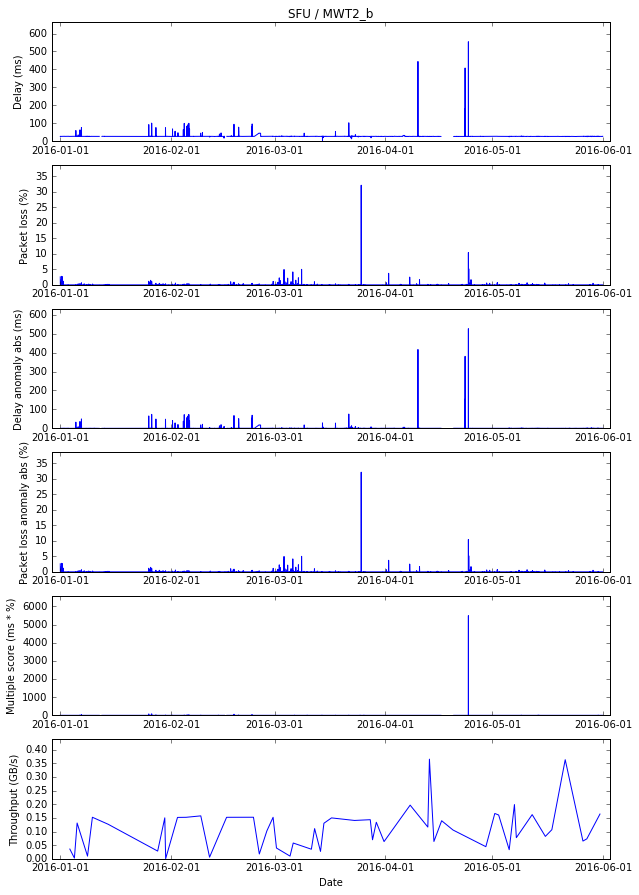

18.  SFU -> MWT2_c


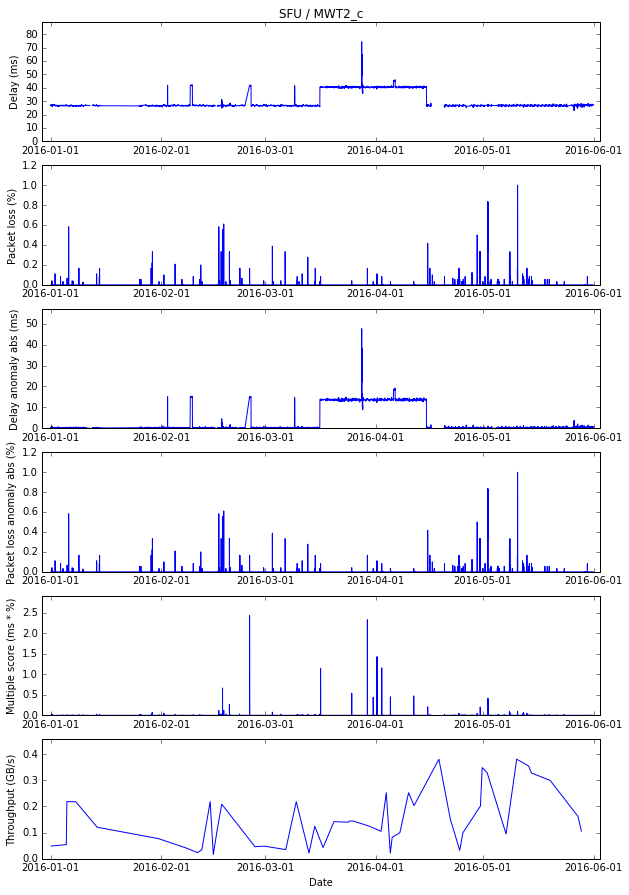

19.  SFU -> CERN


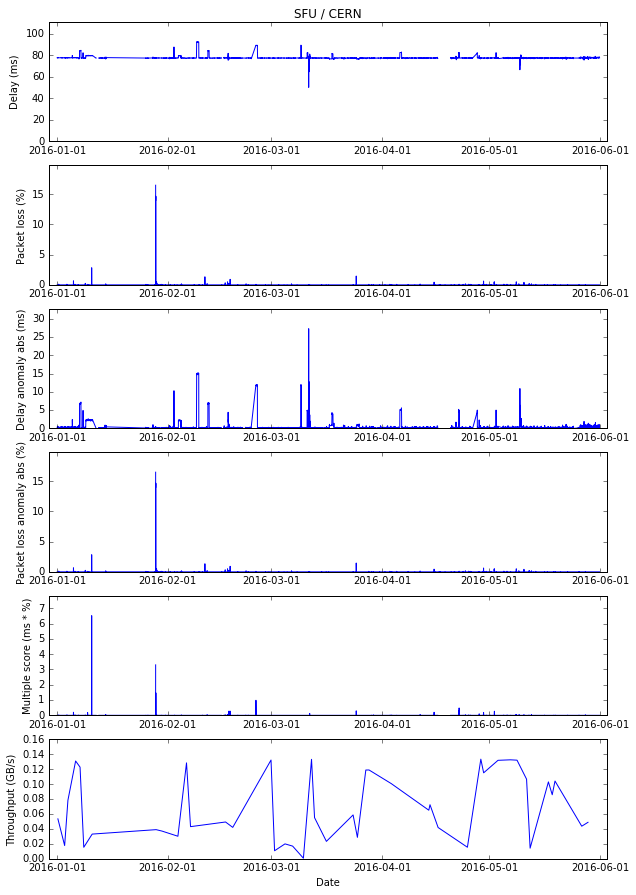

20.  SFU -> BEIJING


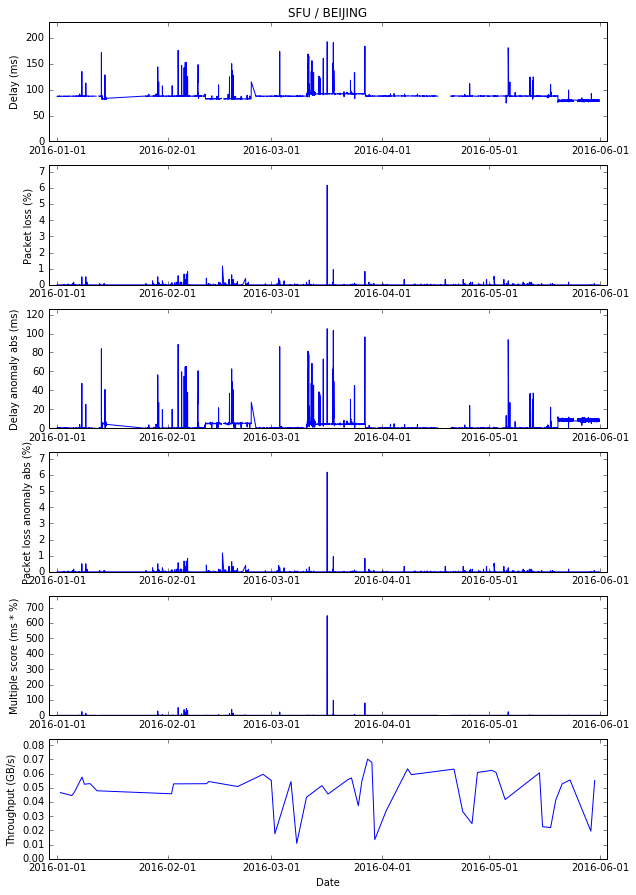

21.  CERN -> MWT2_a


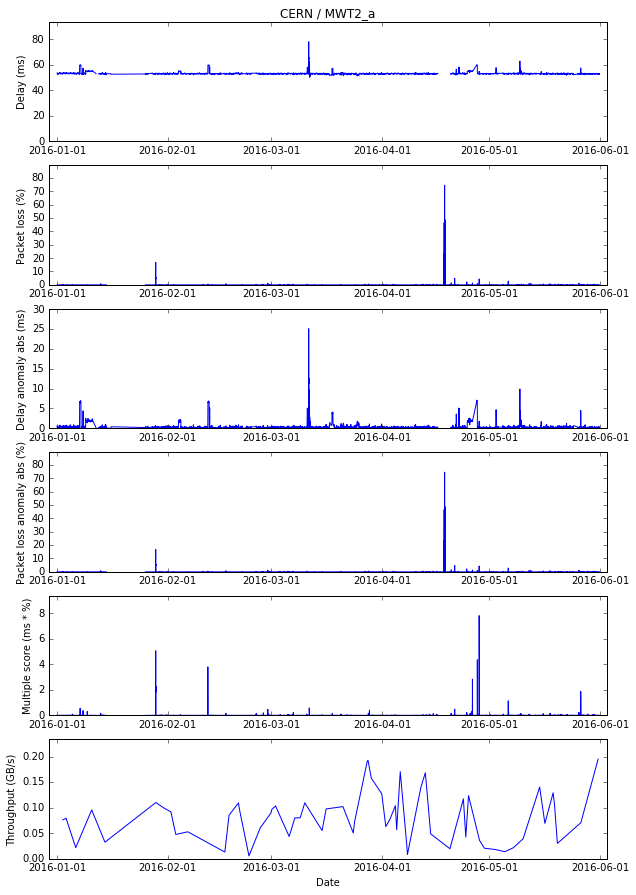

22.  CERN -> MWT2_b


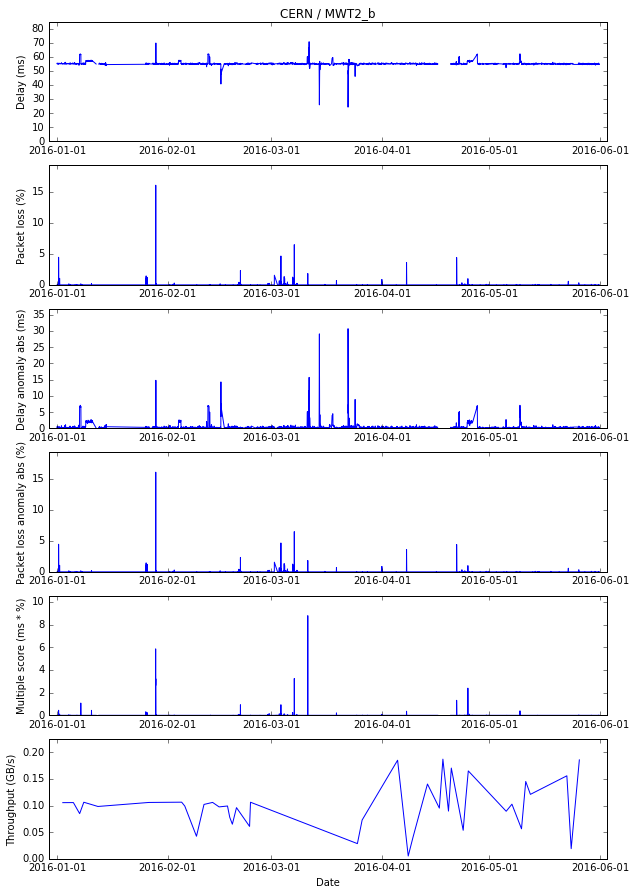

23.  CERN -> MWT2_c


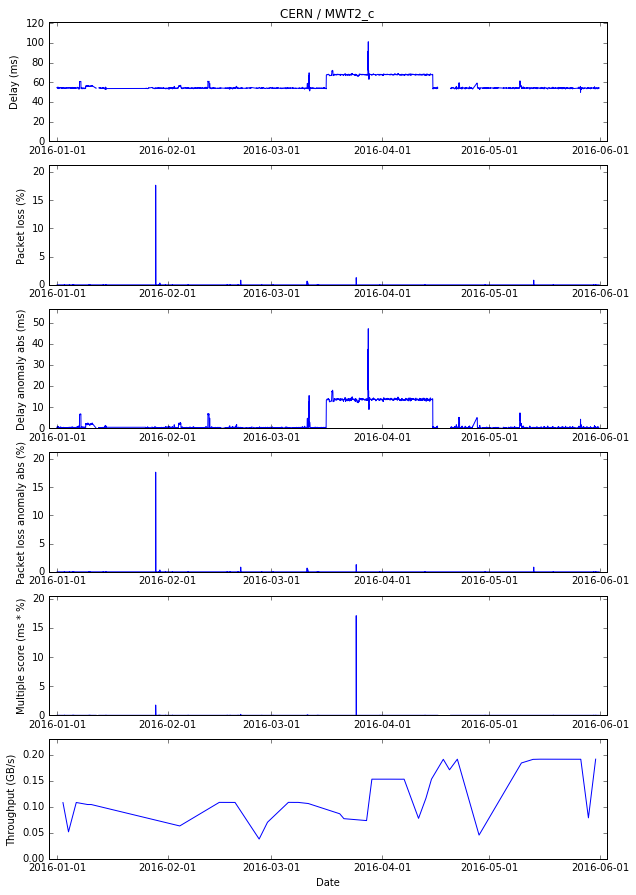

24.  CERN -> SFU


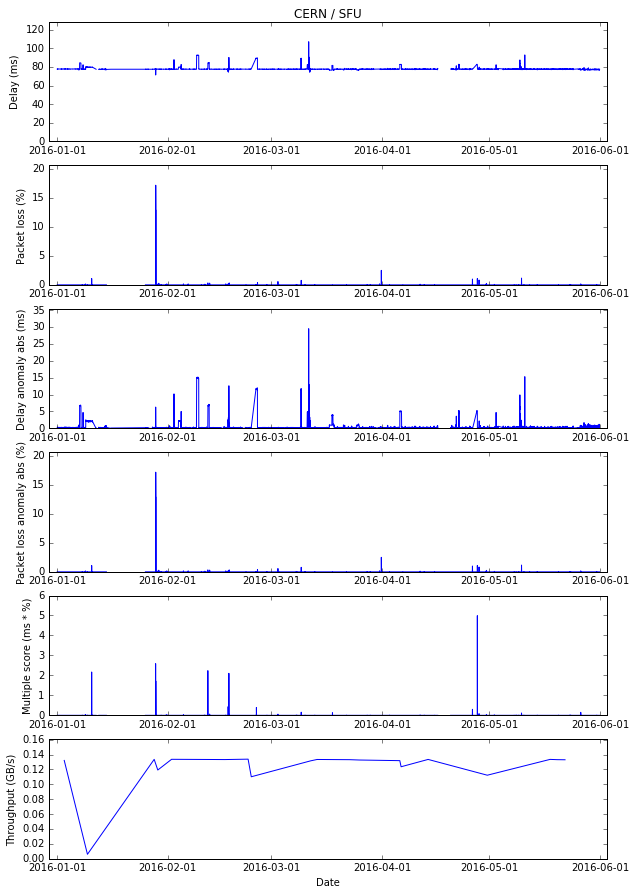

25.  CERN -> BEIJING


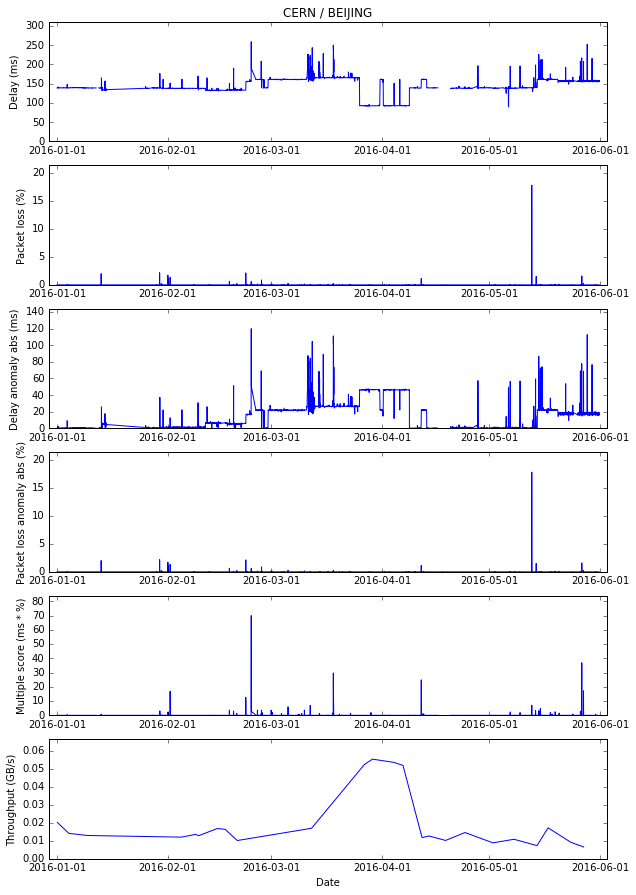

26.  BEIJING -> MWT2_a


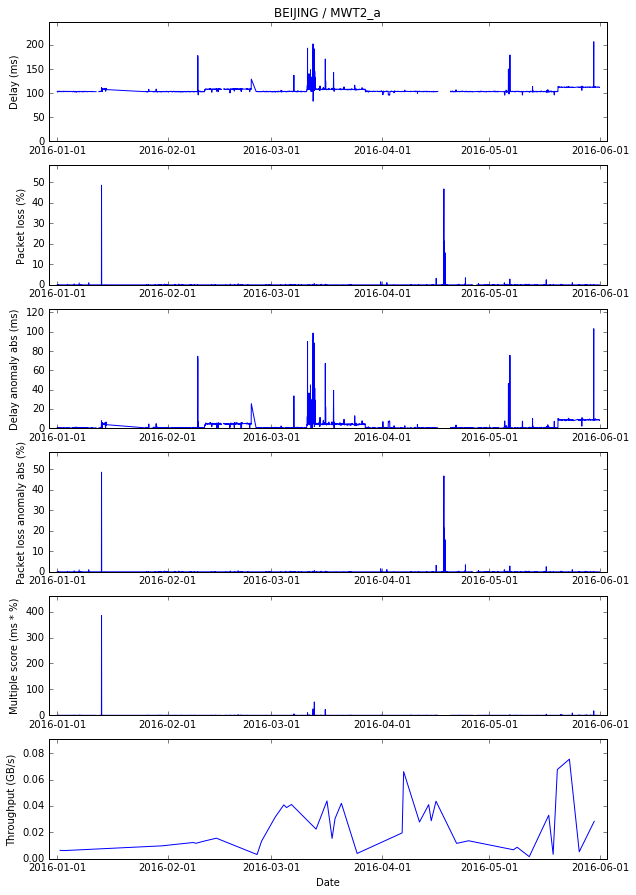

27.  BEIJING -> MWT2_b


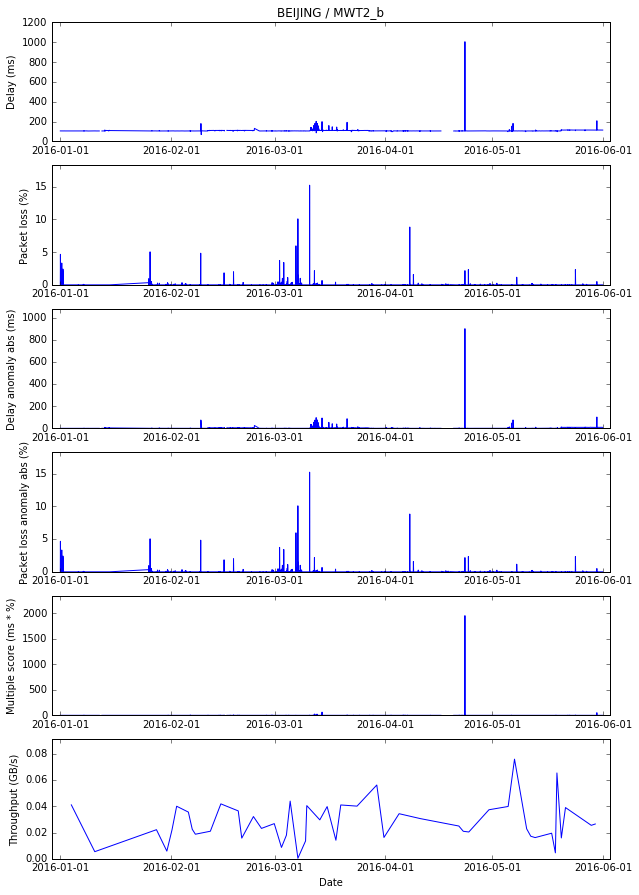

28.  BEIJING -> MWT2_c


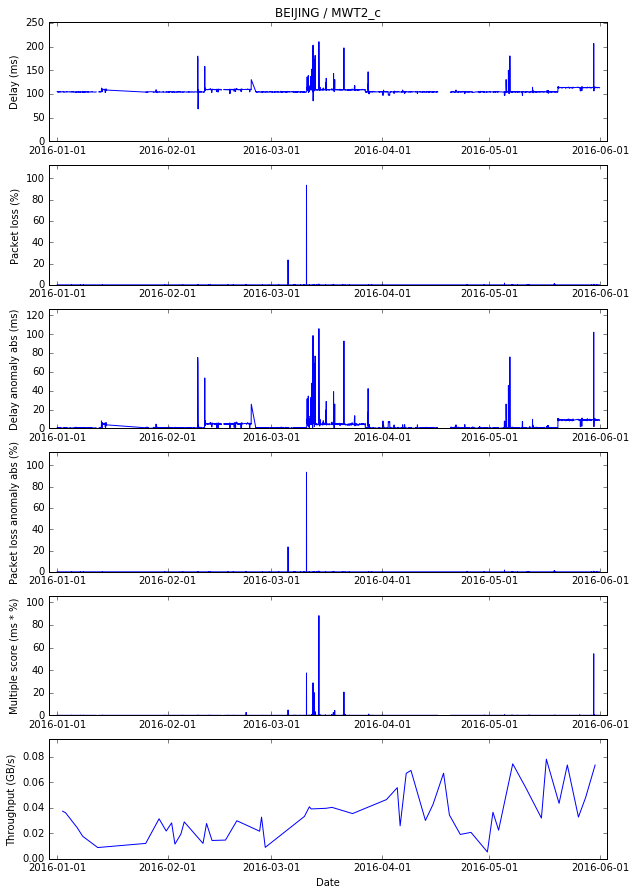

29.  BEIJING -> SFU


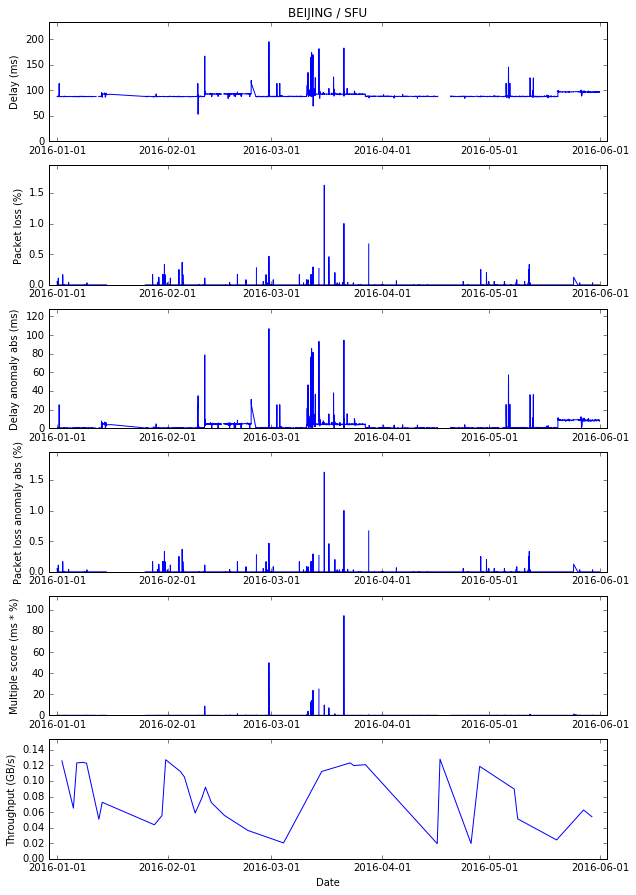

30.  BEIJING -> CERN


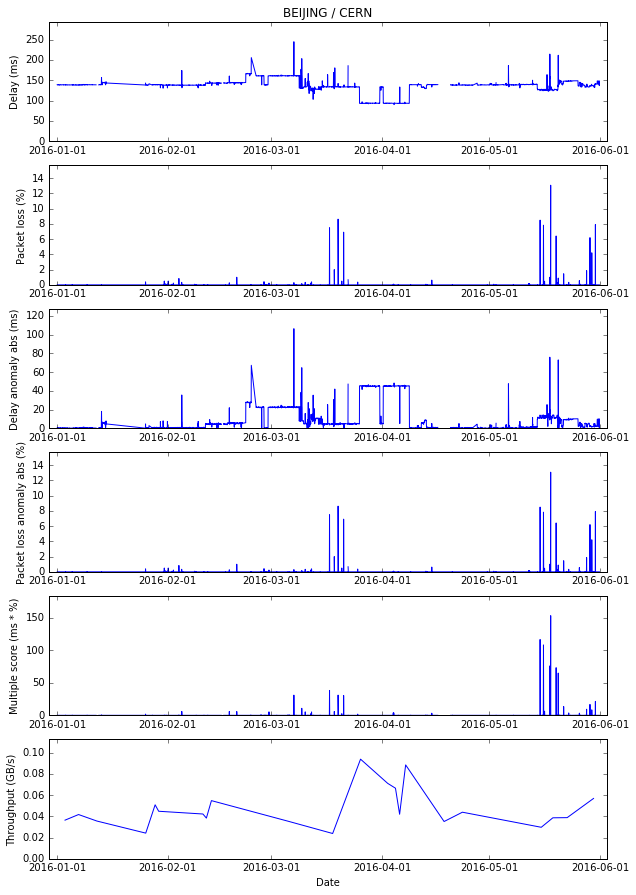

In [84]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            time_window_length = 12 * 60 * 60 * 1000   # 12 hours, half a day, convert hours to ms

            dm_median = dm.median()
            pl_median = pl.median()
            
            row = data_lpl.shape[0]
            for r in range(row):
                line = data_lpl.iloc[r]
                value1 = abs(line['delay_median'] - dm_median)
                value2 = abs(line['packet_loss'] * 100 - pl_median)
                data_lpl.set_value(data_lpl.index[r], 'delay_anml_abs', value1)
                data_lpl.set_value(data_lpl.index[r], 'packet_loss_anml_abs', value2)
                data_lpl.set_value(data_lpl.index[r], 'multiple_score', value1 * value2)
            
            plt.figure(figsize=[10, 15])
            
            plt.subplot(6, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)')
            plt.ylabel('Delay (ms)')
            plt.ylim([0, dm.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(6, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)

            plt.subplot(6, 1, 3)
            plt.plot(time_lpl, data_lpl.delay_anml_abs, label='Delay anomaly abs (ms)')
            plt.ylabel('Delay anomaly abs (ms)')
            plt.ylim([0, data_lpl.delay_anml_abs.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(6, 1, 4)
            plt.plot(time_lpl, data_lpl.packet_loss_anml_abs, label='Packet loss anomaly abs (%)')
            plt.ylabel('Packet loss anomaly abs (%)')
            plt.ylim([0, data_lpl.packet_loss_anml_abs.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(6, 1, 5)
            plt.plot(time_lpl, data_lpl.multiple_score, label='Multiple score (ms * %)')
            plt.ylabel('Multiple score (ms * %)')
            plt.ylim([0, data_lpl.multiple_score.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(6, 1, 6)
            plt.plot(time_t, tp, label='throughput (GB/s)')
            plt.ylabel('Throughput (GB/s)')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            
            plt.show()

In [85]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            time_window_length = 12 * 60 * 60 * 1000   # 12 hours, half a day, convert hours to ms

            dm_median = dm.median()
            pl_median = pl.median()
            
            dm_std = dm.std()
            pl_std = pl.std()
            print('delay std dev = {}'.format(dm_std))
            print('packet loss std dev = {}'.format(pl_std))
            

1.  MWT2_a -> MWT2_b
delay std dev = 0.48920844723829054
packet loss std dev = 1.2271793571884273
2.  MWT2_a -> MWT2_c
delay std dev = 0.7984309337852659
packet loss std dev = 0.9844631660596794
3.  MWT2_a -> SFU
delay std dev = 2.626957122535643
packet loss std dev = 0.22512300580919656
4.  MWT2_a -> CERN
delay std dev = 0.9859244568791566
packet loss std dev = 0.3616030942544076
5.  MWT2_a -> BEIJING
delay std dev = 6.381121420052745
packet loss std dev = 0.03455545611747674
6.  MWT2_b -> MWT2_a
delay std dev = 1.8997433749305688
packet loss std dev = 1.7273682922616382
7.  MWT2_b -> MWT2_c
delay std dev = 6.124292094248104
packet loss std dev = 0.07015402456546795
8.  MWT2_b -> SFU
delay std dev = 10.597953992197956
packet loss std dev = 0.1753404257554306
9.  MWT2_b -> CERN
delay std dev = 0.9442323523099029
packet loss std dev = 0.2901342021122825
10.  MWT2_b -> BEIJING
delay std dev = 6.486717578092377
packet loss std dev = 0.13887323844118055
11.  MWT2_c -> MWT2_a
delay std dev 

1.  MWT2_a -> MWT2_b


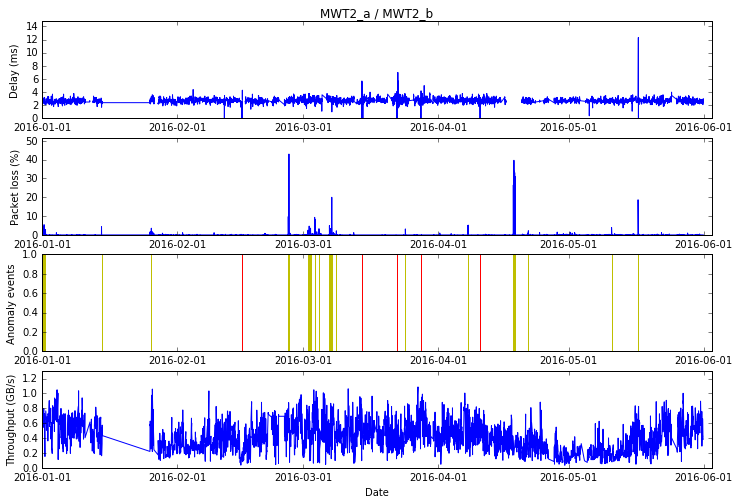

2.  MWT2_a -> MWT2_c


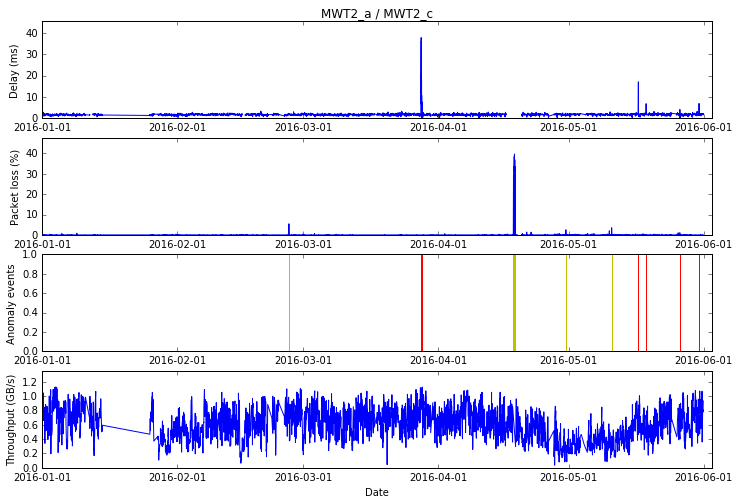

3.  MWT2_a -> SFU


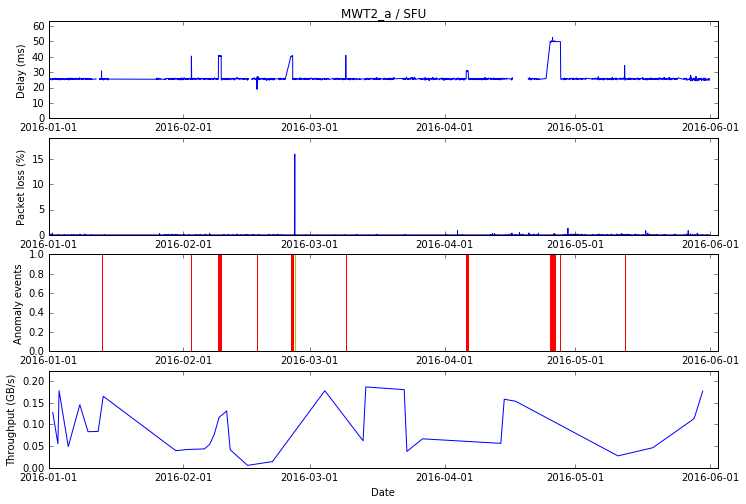

4.  MWT2_a -> CERN


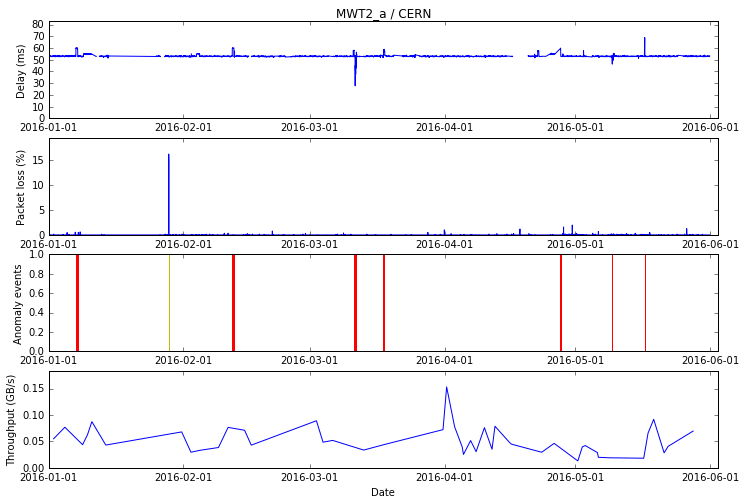

5.  MWT2_a -> BEIJING


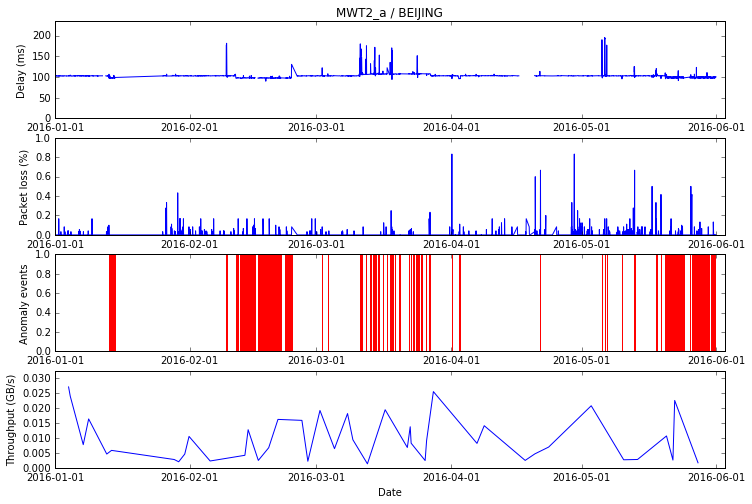

6.  MWT2_b -> MWT2_a


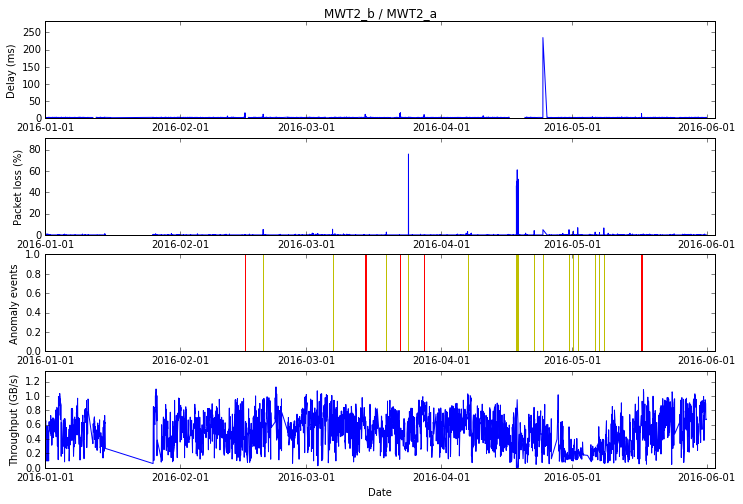

7.  MWT2_b -> MWT2_c


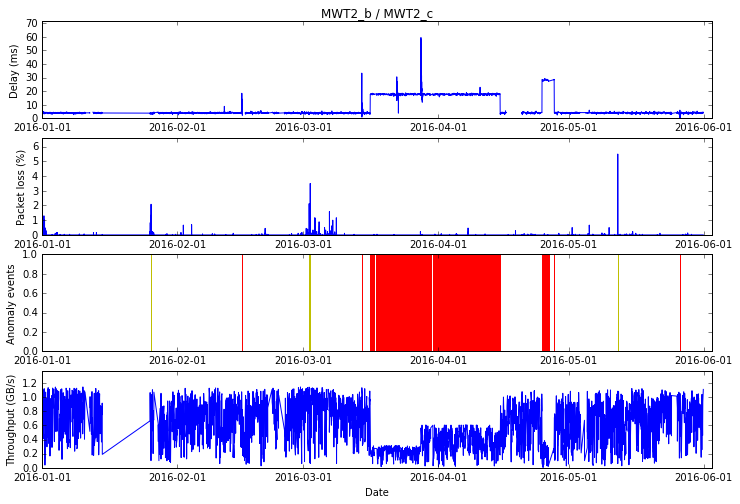

8.  MWT2_b -> SFU


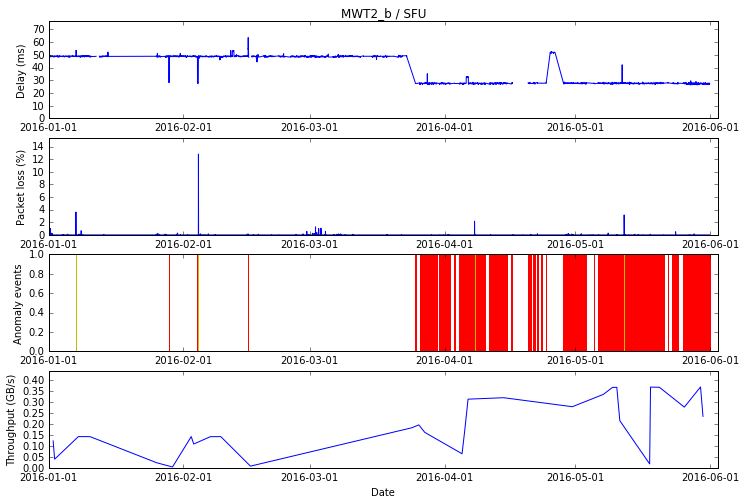

9.  MWT2_b -> CERN


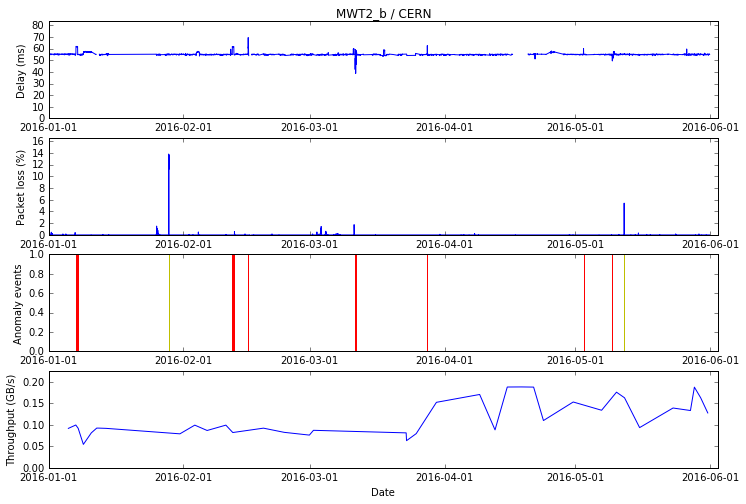

10.  MWT2_b -> BEIJING


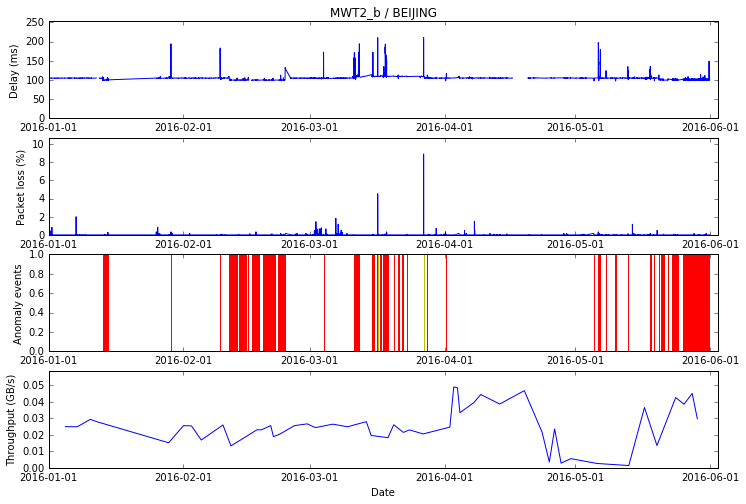

11.  MWT2_c -> MWT2_a


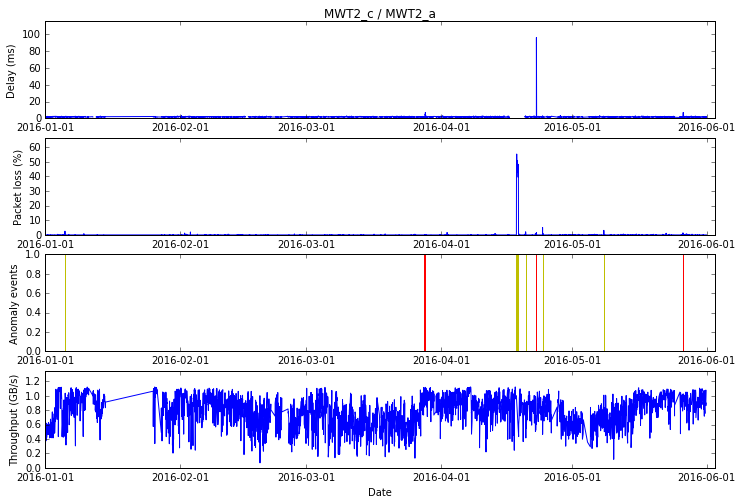

12.  MWT2_c -> MWT2_b


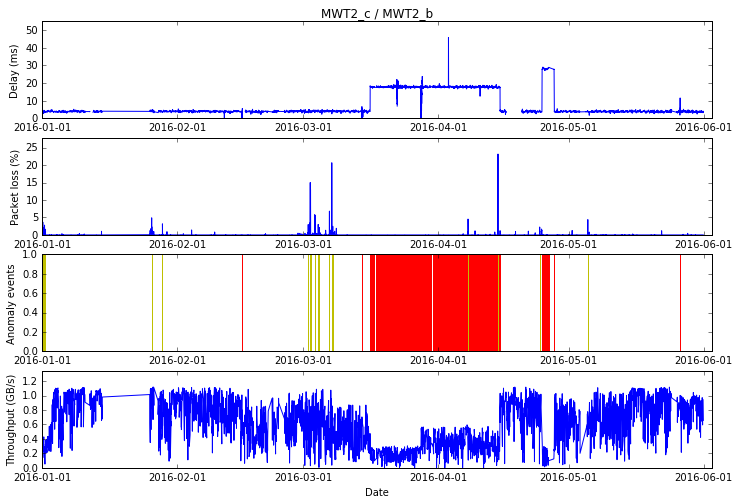

13.  MWT2_c -> SFU


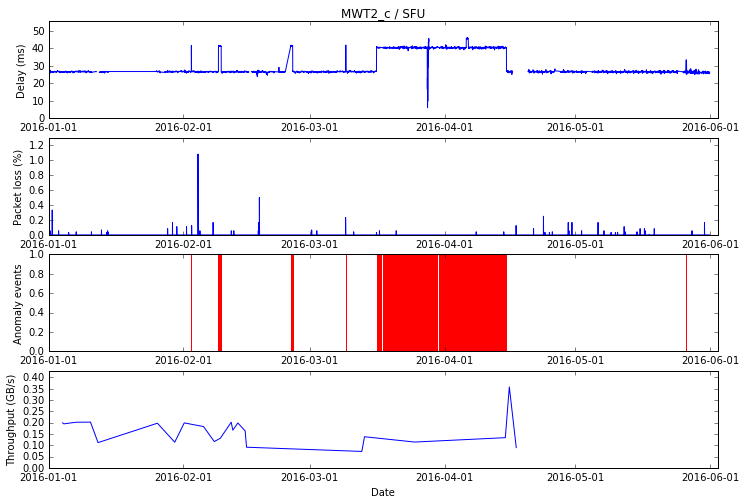

14.  MWT2_c -> CERN


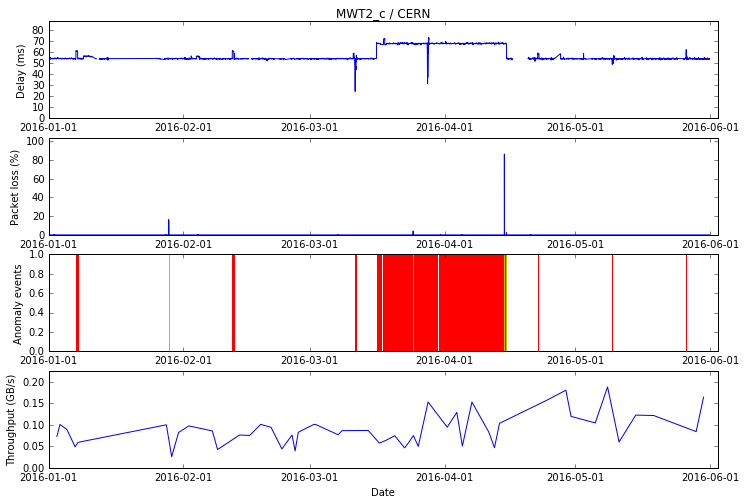

15.  MWT2_c -> BEIJING


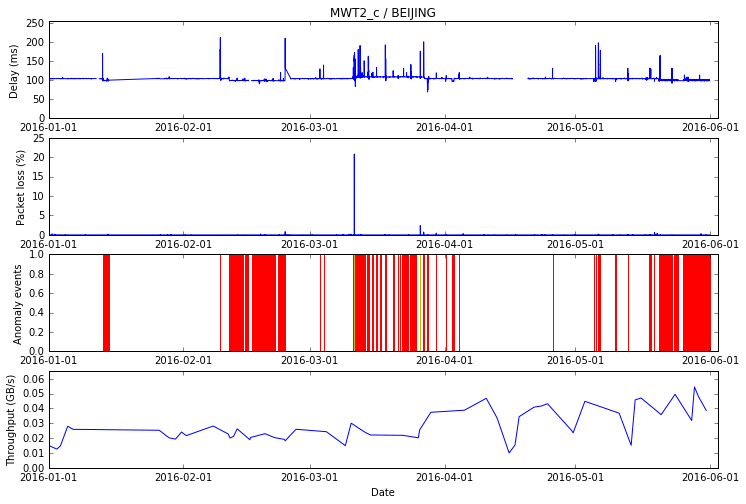

16.  SFU -> MWT2_a


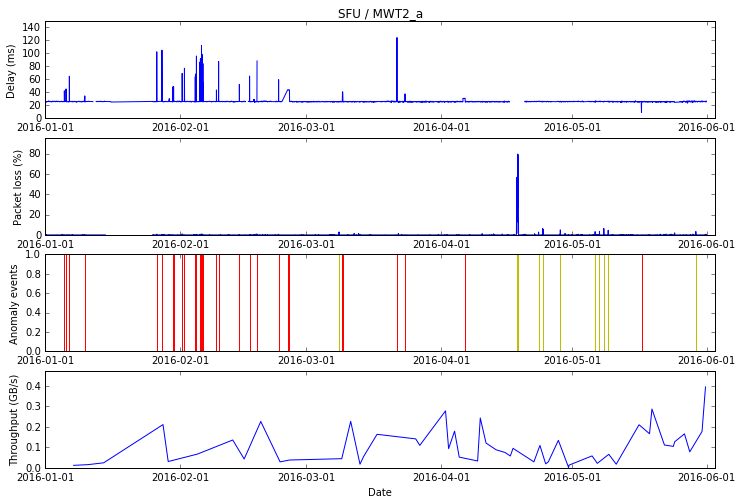

17.  SFU -> MWT2_b


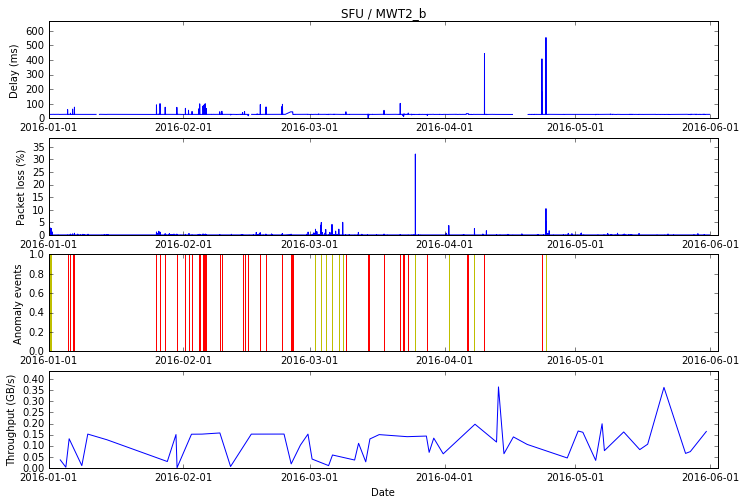

18.  SFU -> MWT2_c


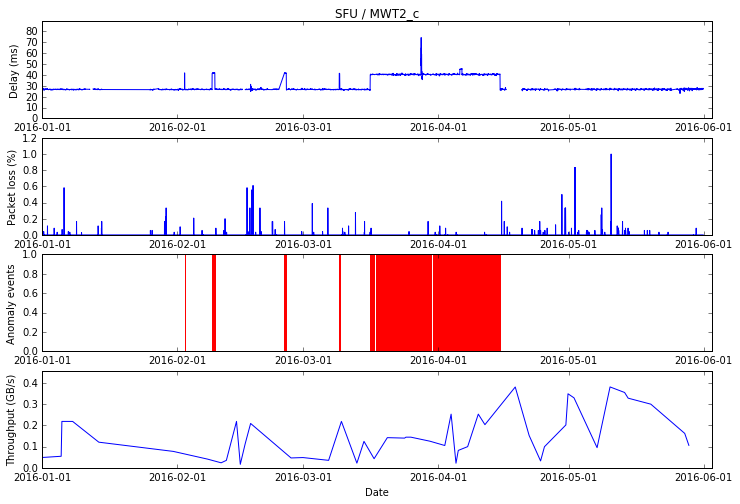

19.  SFU -> CERN


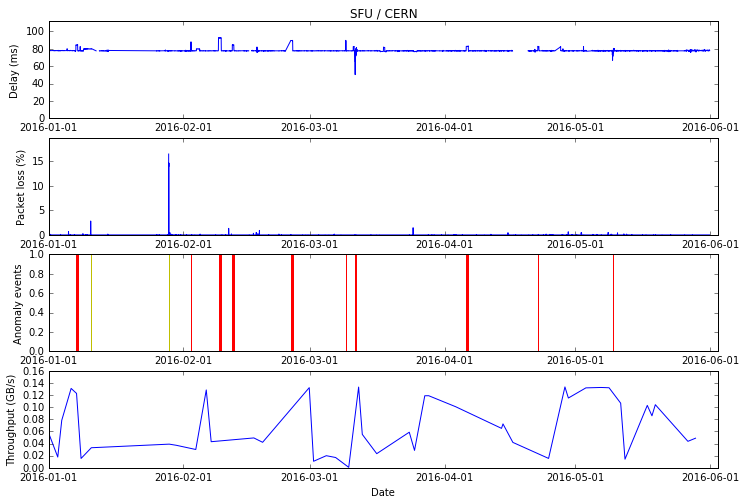

20.  SFU -> BEIJING


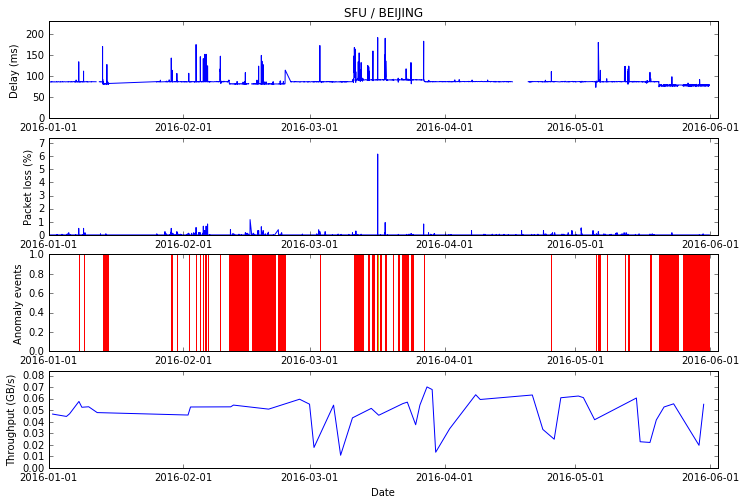

21.  CERN -> MWT2_a


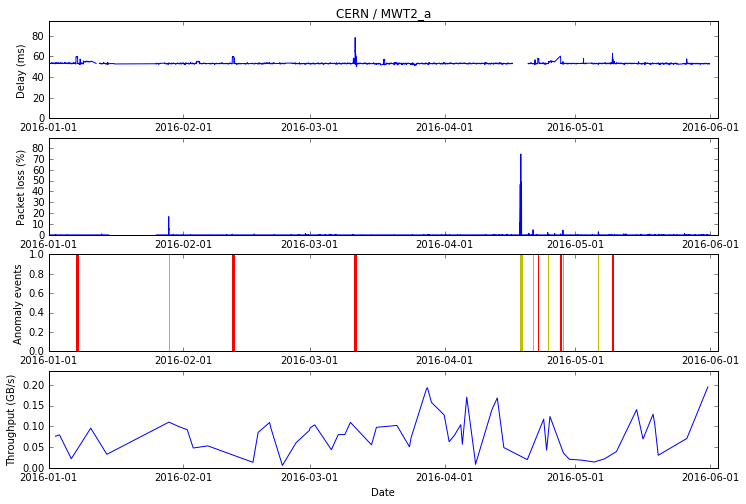

22.  CERN -> MWT2_b


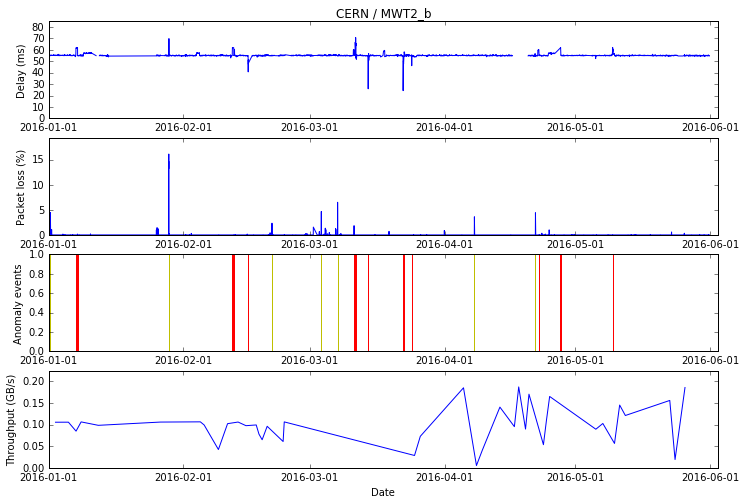

23.  CERN -> MWT2_c


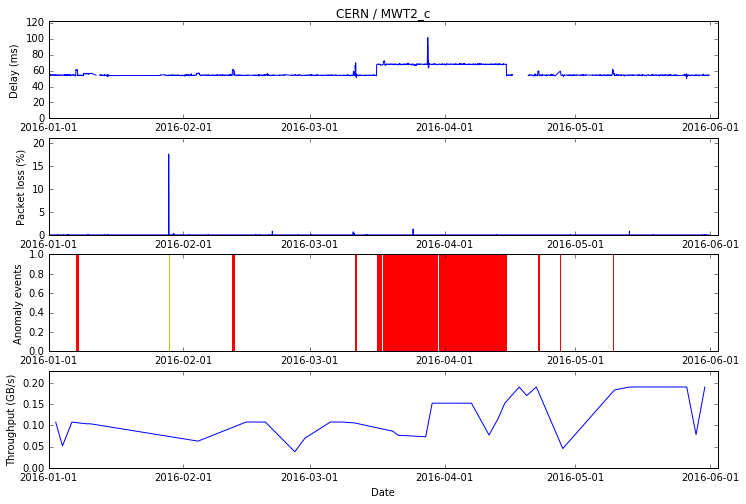

24.  CERN -> SFU


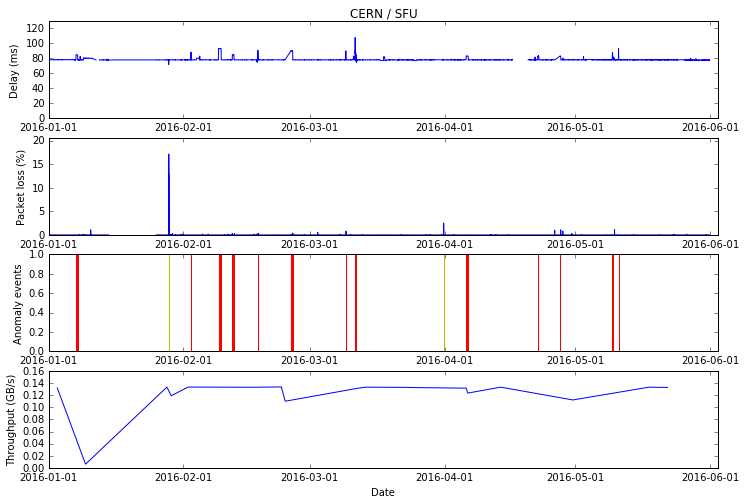

25.  CERN -> BEIJING


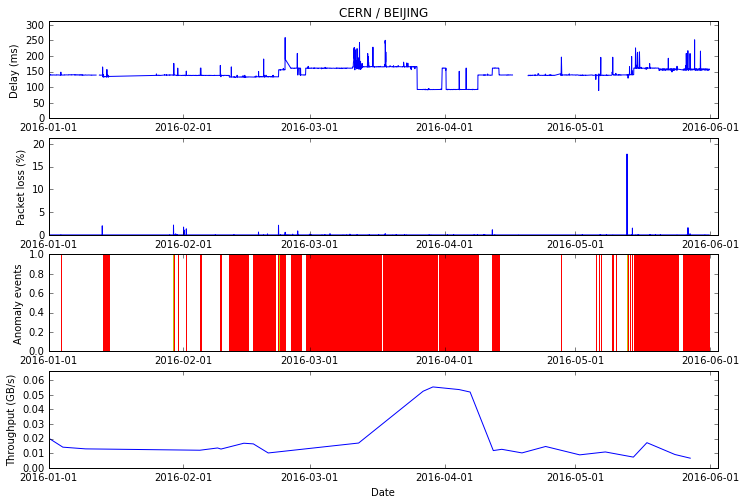

26.  BEIJING -> MWT2_a


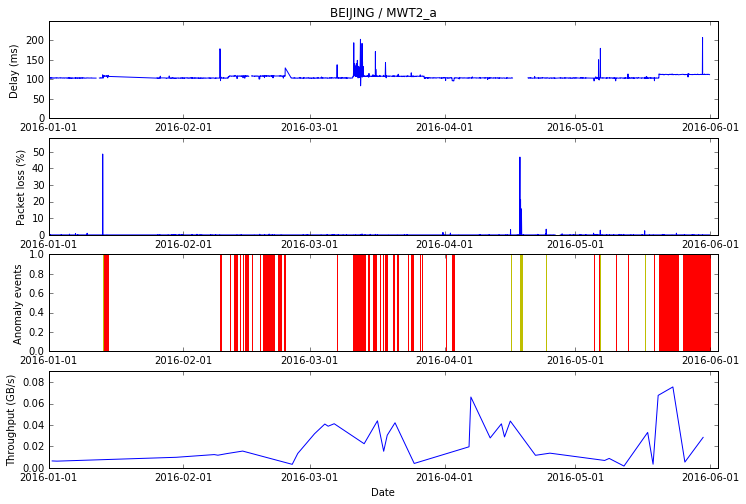

27.  BEIJING -> MWT2_b


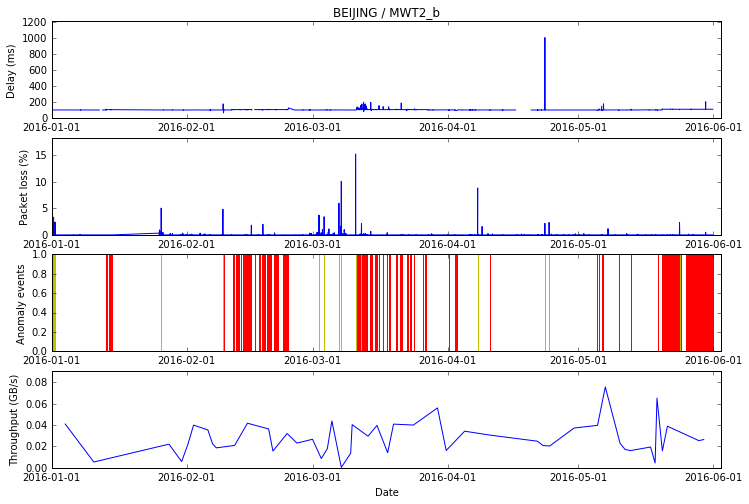

28.  BEIJING -> MWT2_c


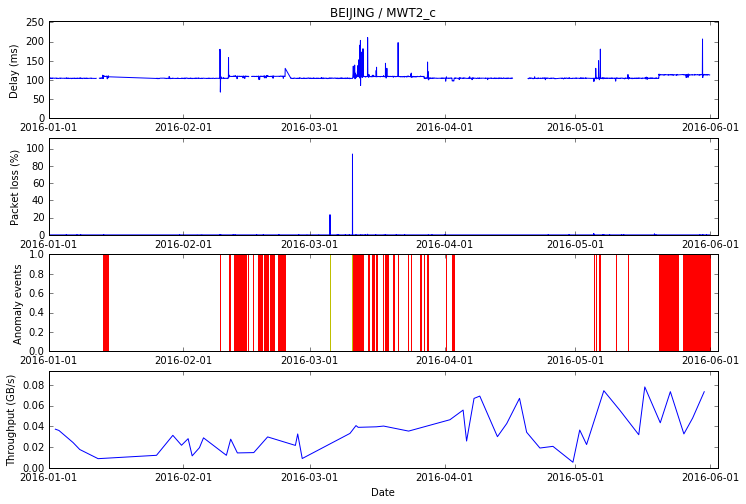

29.  BEIJING -> SFU


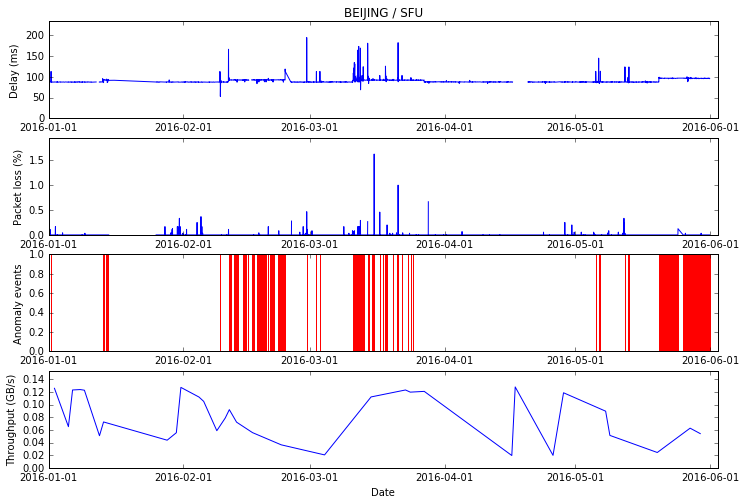

30.  BEIJING -> CERN


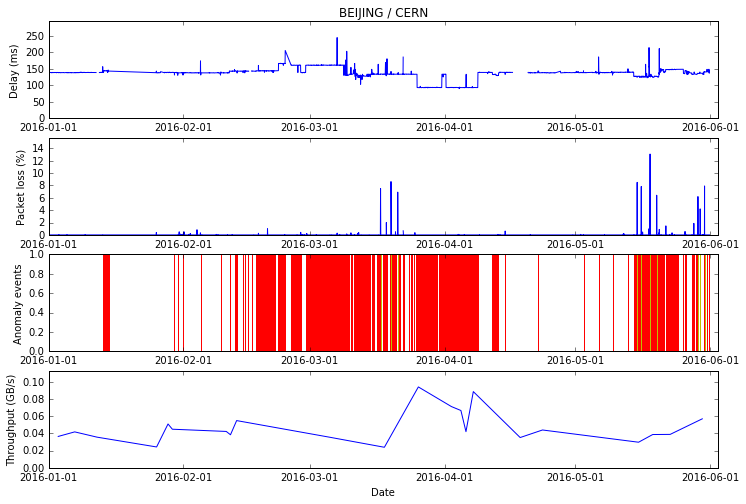

In [98]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100.
            
            time_t = data_t.index
            tp = data_t.throughput / 1024. / 1024 / 1024
            
            dm_median = dm.median()
            pl_median = pl.median()
            
            set_dm = set()
            set_pl = set()
            
            row = data_lpl.shape[0]
            for r in range(row):
                line = data_lpl.iloc[r]
                value1 = abs(line['delay_median'] - dm_median)
                value2 = abs(line['packet_loss'] * 100 - pl_median)
                if value1 > 5:
                    set_dm.add(data_lpl.index[r])
                if value2 > 2:
                    set_pl.add(data_lpl.index[r])

            plt.figure(figsize=[12, 8])
            xmin=1461400000000
            xmax=1469841347000
            plt.subplot(4, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)')
            plt.ylabel('Delay (ms)')
            plt.ylim([0, dm.max() * 1.2])
            #plt.ylim([0, 6])
            plt.xlim([xmin, xmax])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(4, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([xmin, xmax])
            plt.xticks(x, lbl, rotation=0)
    
            plt.subplot(4, 1, 3)
            for t in set_dm:
                plt.axvline(x=t, ymin=0, ymax=1, color='r')
            for t in set_pl:
                plt.axvline(x=t, ymin=0, ymax=1, color='y')
            plt.ylabel('Anomaly events')
            plt.xlim([xmin, xmax])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(4, 1, 4)
            plt.plot(time_t, tp, label='throughput (GB/s)')
            plt.ylabel('Throughput (Gbps)')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([xmin, xmax])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            plt.show()

# For 08/17 NA Throughput Meeting: redraw plots

1.  University of Chicago -> Indiana University


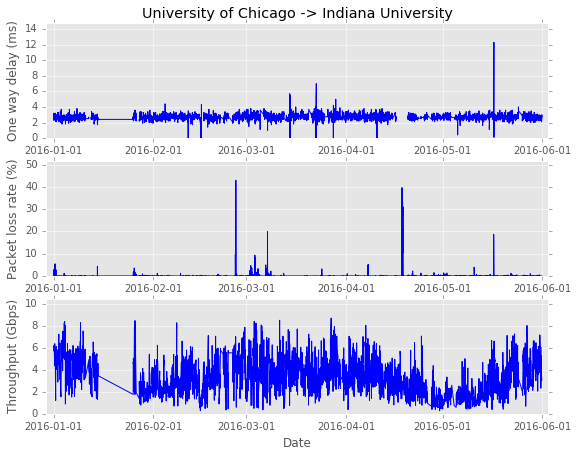

2.  University of Chicago -> UIUC


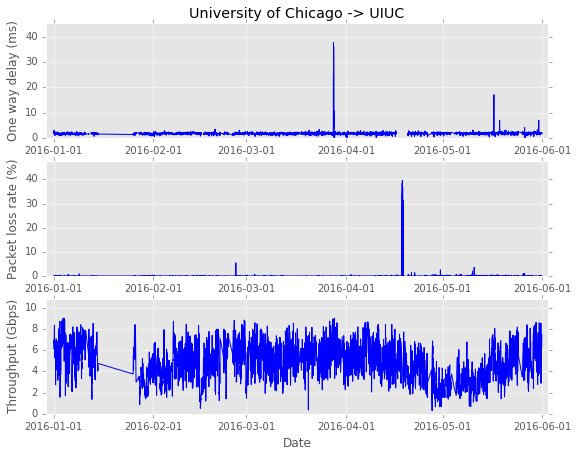

3.  University of Chicago -> SFU


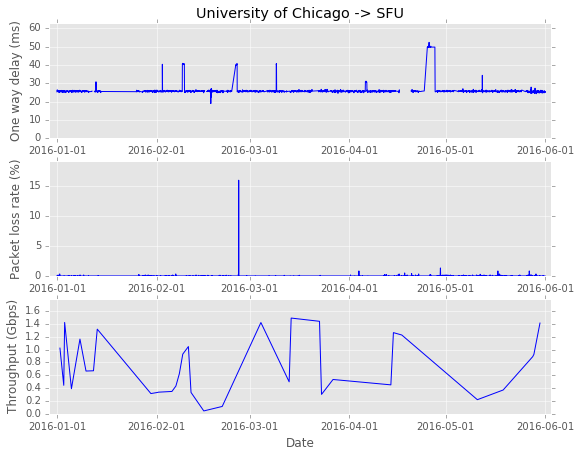

4.  University of Chicago -> CERN


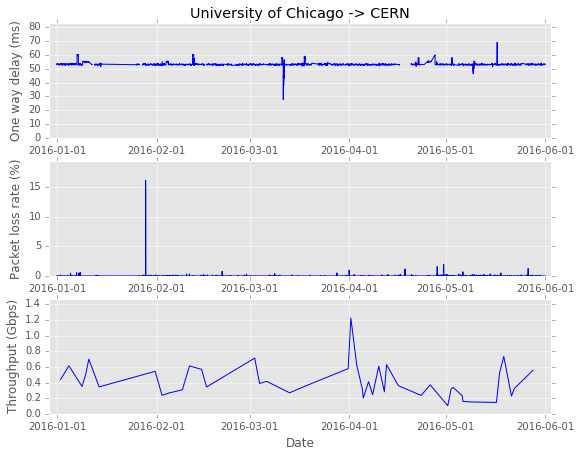

5.  University of Chicago -> BEIJING


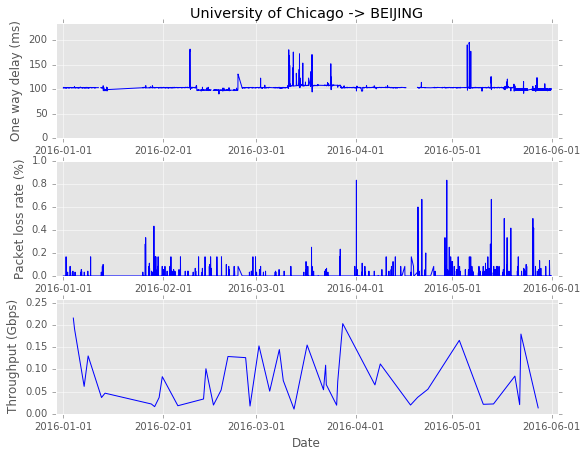

6.  Indiana University -> University of Chicago


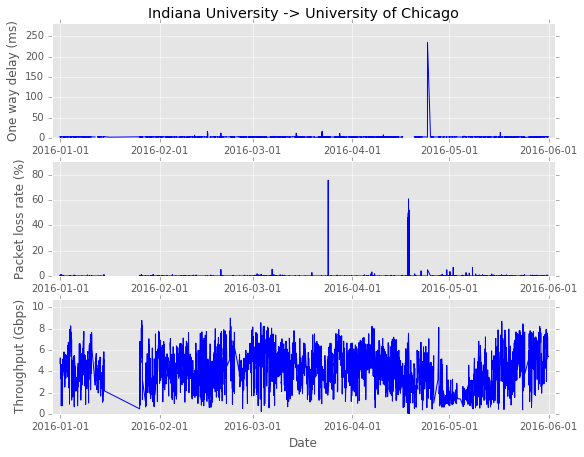

7.  Indiana University -> UIUC


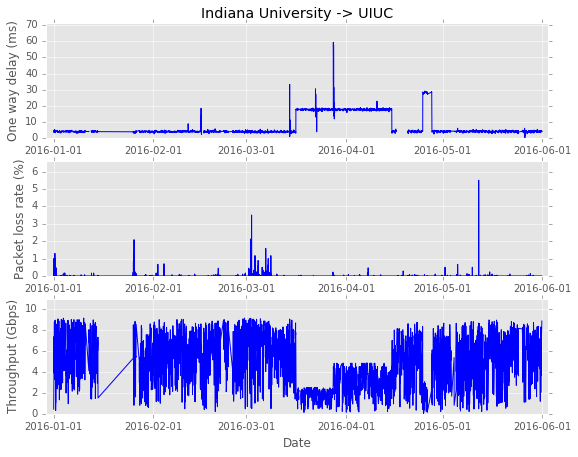

8.  Indiana University -> SFU


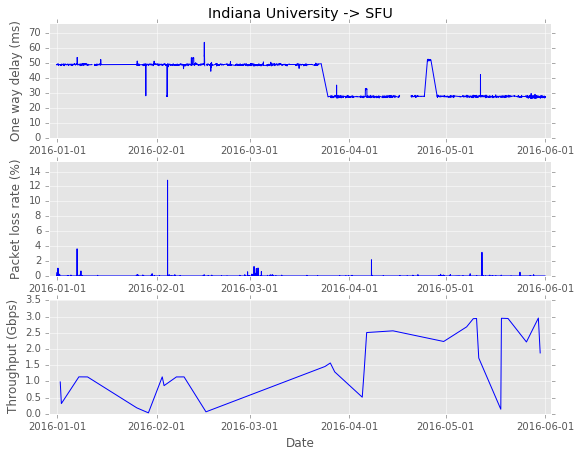

9.  Indiana University -> CERN


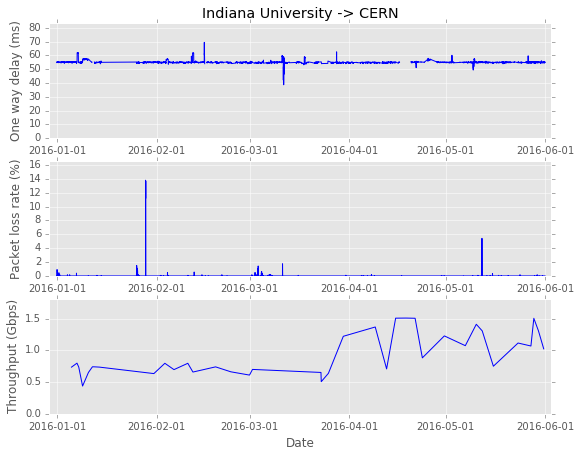

10.  Indiana University -> BEIJING


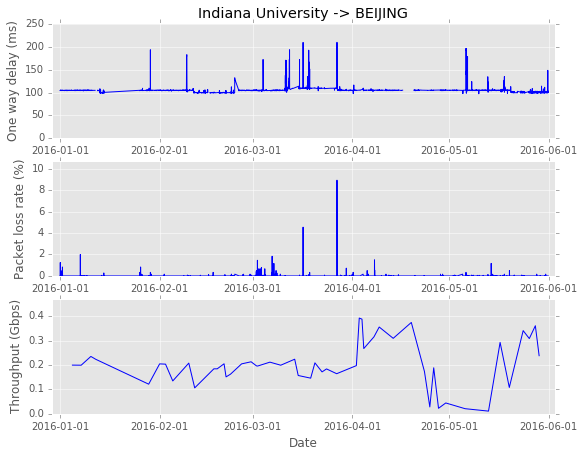

11.  UIUC -> University of Chicago


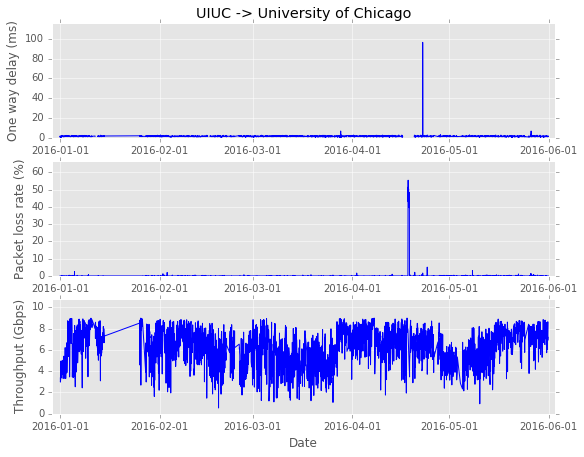

12.  UIUC -> Indiana University


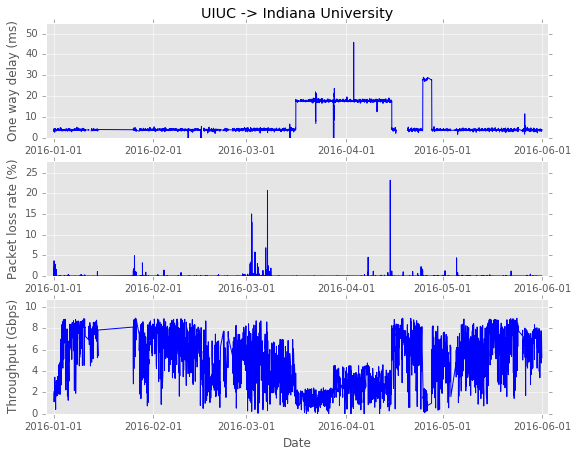

13.  UIUC -> SFU


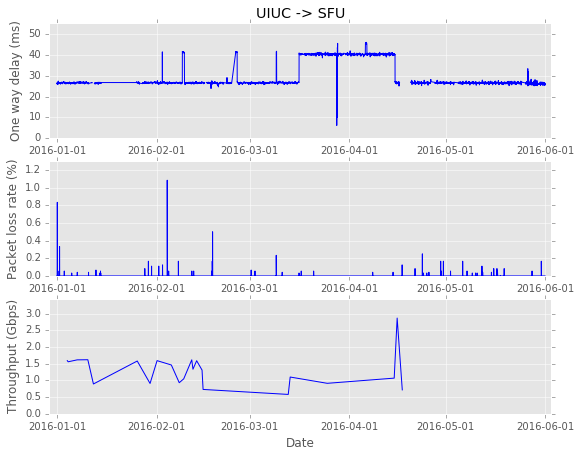

14.  UIUC -> CERN


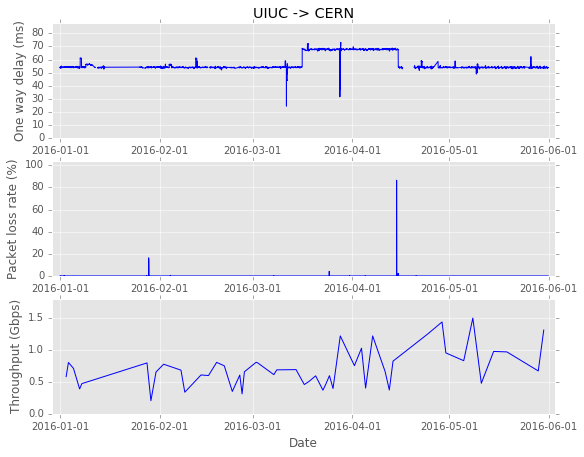

15.  UIUC -> BEIJING


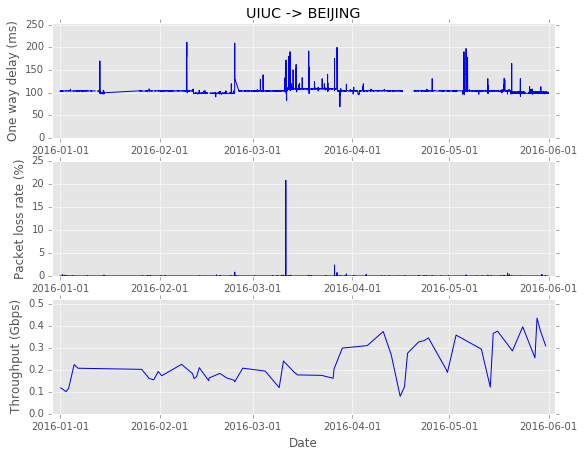

16.  SFU -> University of Chicago


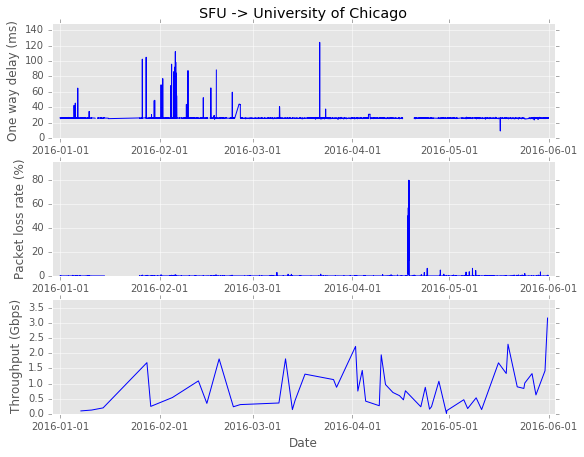

17.  SFU -> Indiana University


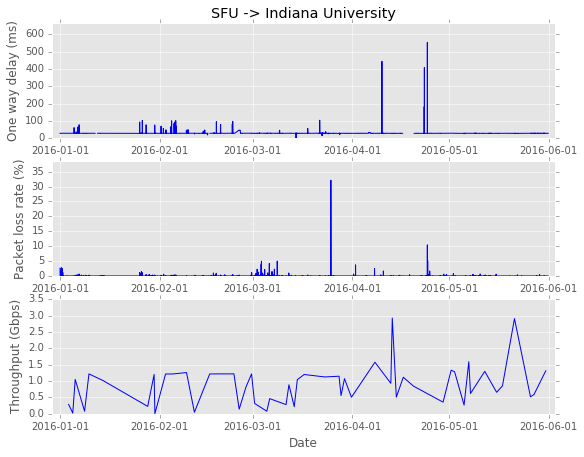

18.  SFU -> UIUC


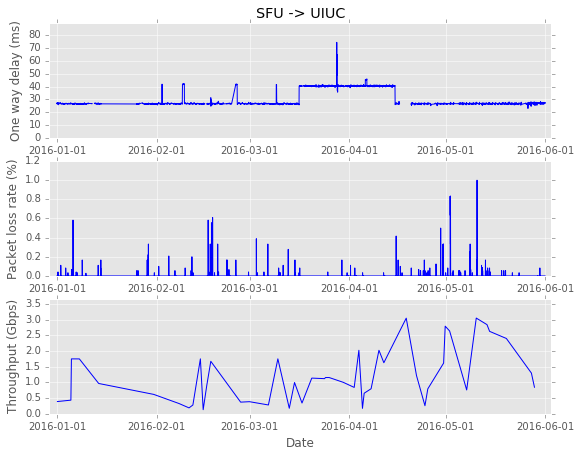

19.  SFU -> CERN


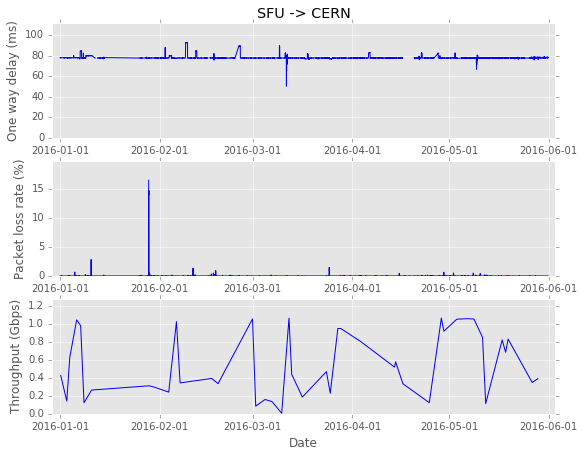

20.  SFU -> BEIJING


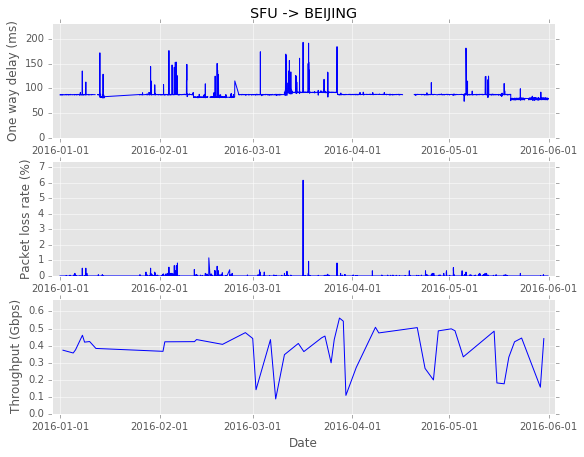

21.  CERN -> University of Chicago


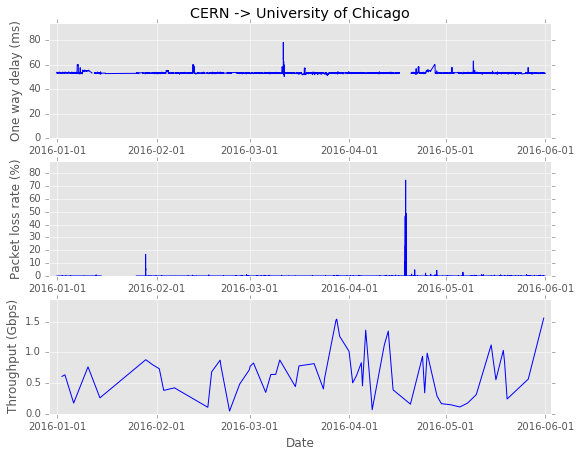

22.  CERN -> Indiana University


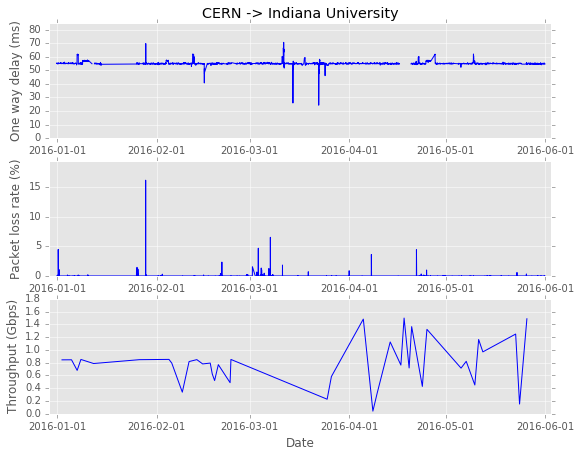

23.  CERN -> UIUC


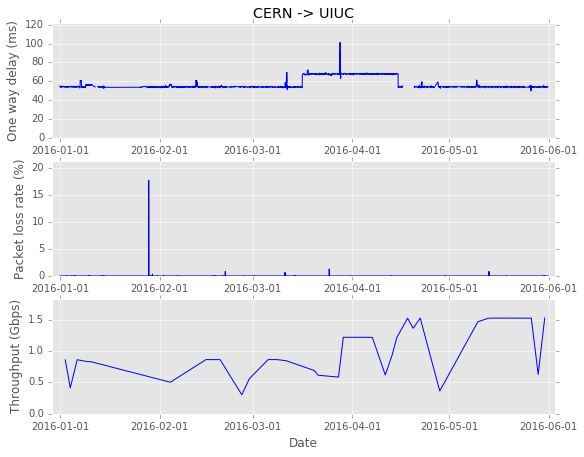

24.  CERN -> SFU


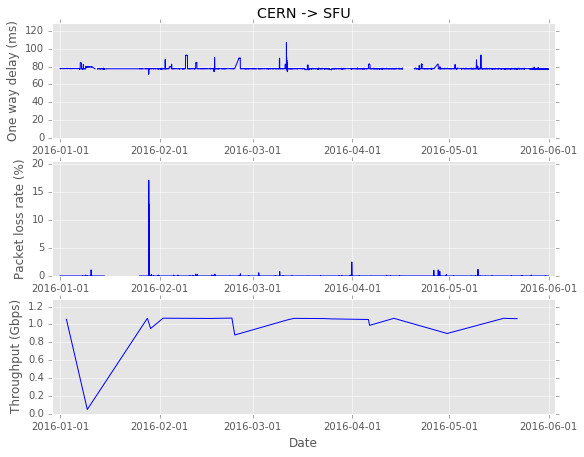

25.  CERN -> BEIJING


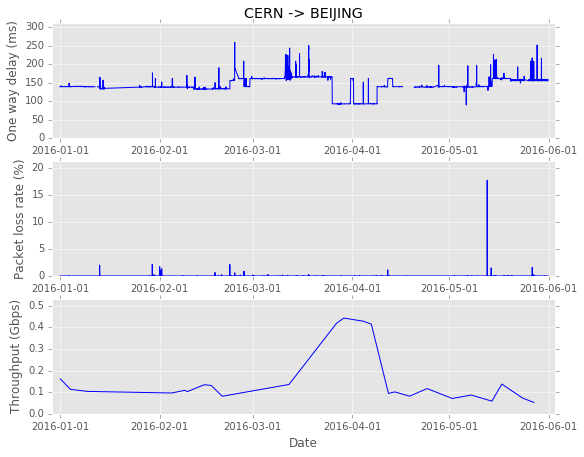

26.  BEIJING -> University of Chicago


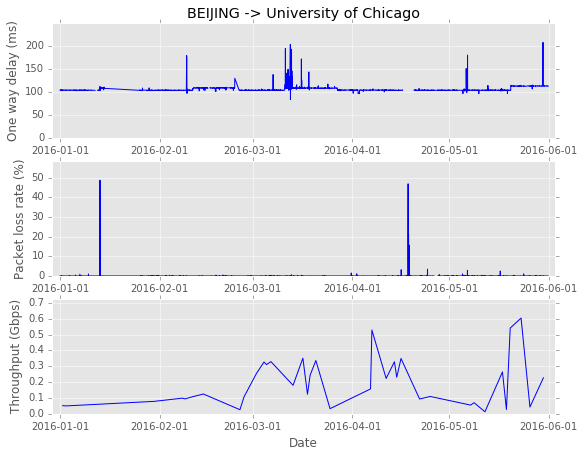

27.  BEIJING -> Indiana University


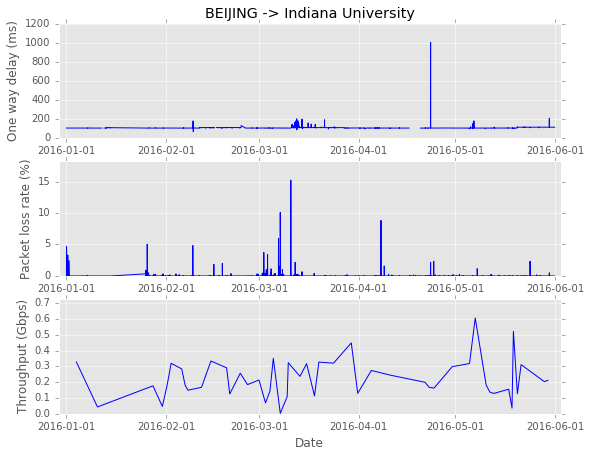

28.  BEIJING -> UIUC


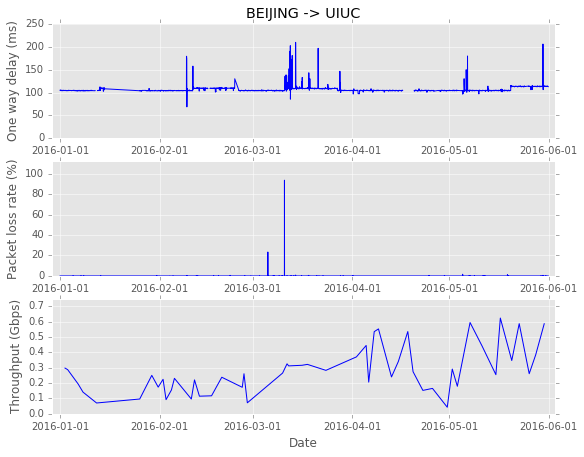

29.  BEIJING -> SFU


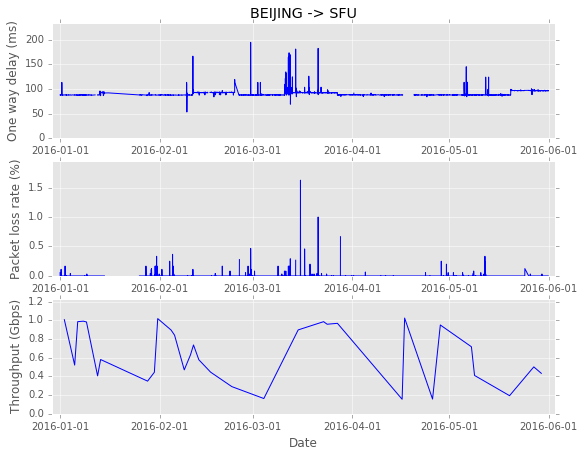

30.  BEIJING -> CERN


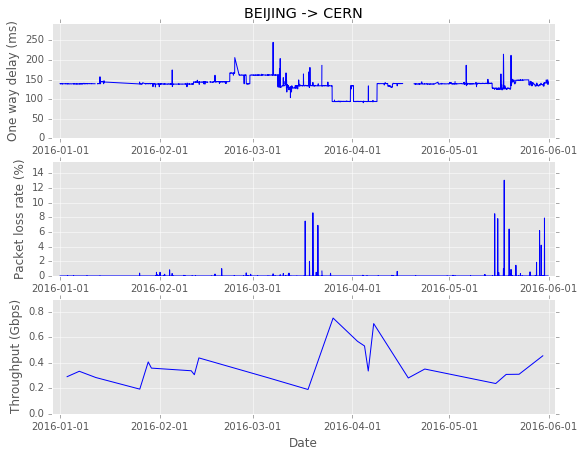

In [11]:
name_list = ['University of Chicago', 'Indiana University', 'UIUC', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024   # Gbps
                
            plt.figure(figsize=[9, 7])
            
            plt.subplot(3, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)', color='b')
            plt.ylabel('One way delay (ms)')
            plt.ylim([0, dm.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} -> {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(3, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)', color='b')
            plt.ylabel('Packet loss rate (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(3, 1, 3)
            plt.plot(time_t, tp, label='throughput (Gbps)', color='b')
            plt.ylabel('Throughput (Gbps)')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            
            plt.show()